## Pandas module & loading data

In [13]:
import pandas as pd

In [20]:
xls = pd.ExcelFile('yelp.xlsx', engine='openpyxl')
df = xls.parse('yelp_data')

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [15]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1


## Joining data

In [21]:
df_cities = xls.parse('cities')

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [22]:
df_cities.head()

,id,city
0,1,Bellevue
1,2,Braddock
2,3,Carnegie
3,4,Homestead
4,5,Mc Kees Rocks


In [23]:
df = pd.merge(left=df, right=df_cities, how='inner', left_on='city_id', right_on='id')

In [24]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id,city
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue


In [27]:
df_states = xls.parse('states', engine='openpyxl')

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [28]:
df_states.head()

,id,state
0,1,PA
1,2,NV


In [29]:
df = pd.merge(left=df, right=df_states, how='inner', left_on='state_id', right_on='id')

In [30]:
df.shape

(600, 12)

In [31]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id_x,city,id_y,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue,1,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue,1,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue,1,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue,1,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue,1,PA


In [32]:
atts = ['name', 'city', 'state']
df[atts].head(100)

,name,city,state
0,China Sea Chinese Restaurant,Bellevue,PA
1,Discount Tire Center,Bellevue,PA
2,Frankfurters,Bellevue,PA
3,Fred Dietz Floral,Bellevue,PA
4,Kuhn's Market,Bellevue,PA
...,...,...,...
95,Aamco Transmissions,Pittsburgh,PA
96,Animal Rescue League Shelter & Wildlife Center,Pittsburgh,PA
97,Aracri's Greentree Inn,Pittsburgh,PA
98,Atch-Mont Real Estate,Pittsburgh,PA


In [33]:
del df['id_x']

In [34]:
del df['id_y']

In [35]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA


## Slicing rows

In [36]:
df[100:200]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
100,Au Bon Pain Co,Food,Bakeries,False,7,3.0,8,1,Pittsburgh,PA
101,Bado's Pizza Grill and Ale House,Italian,Bars,True,93,3.5,8,1,Pittsburgh,PA
102,Bastone Auto Service,Auto Repair,Automotive,False,20,4.0,8,1,Pittsburgh,PA
103,Bellisario's Pizza Palace,Italian,Pizza,True,21,3.5,8,1,Pittsburgh,PA
104,Benedum Center for the Performing Arts,Opera & Ballet,Arts & Entertainment,False,56,4.5,8,1,Pittsburgh,PA
...,...,...,...,...,...,...,...,...,...,...
195,McDonald's,Burgers,Fast Food,True,5,2.0,8,1,Pittsburgh,PA
196,Miller Ace Hardware,Shopping,Hardware Stores,False,5,4.5,8,1,Pittsburgh,PA
197,Minutello's Restaurant & Lounge,Italian,Pizza,True,8,3.0,8,1,Pittsburgh,PA
198,Monro Muffler Brake & Service,Tires,Automotive,False,9,2.0,8,1,Pittsburgh,PA


In [19]:
index = len(df) - 1
last_business = df[index:] #get a slice from provided start index all the way to end of dataframe
last_business['name']

599    A Sunrise Towing
Name: name, dtype: object

In [20]:
df[-1:]['name']

599    A Sunrise Towing
Name: name, dtype: object

## Querying data using boolean indexing

In [21]:
pitts = df['city'] == 'Pittsburgh'

In [22]:
type(pitts)

pandas.core.series.Series

In [23]:
pitts

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Name: city, Length: 600, dtype: bool

In [24]:
df[pitts]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
95,Aamco Transmissions,Auto Repair,Automotive,False,21,4.5,8,1,Pittsburgh,PA
96,Animal Rescue League Shelter & Wildlife Center,Animal Shelters,Veterinarians,False,43,4.0,8,1,Pittsburgh,PA
97,Aracri's Greentree Inn,Italian,American (New),True,15,3.5,8,1,Pittsburgh,PA
98,Atch-Mont Real Estate,Real Estate Services,Property Management,False,3,2.0,8,1,Pittsburgh,PA
99,Atria's Restaurant,American (New),Sandwiches,True,69,3.0,8,1,Pittsburgh,PA
...,...,...,...,...,...,...,...,...,...,...
283,Walter's Automotive,Auto Repair,Automotive,False,99,5.0,8,1,Pittsburgh,PA
284,Washington's Landing Marina,Active Life,Boating,False,3,3.0,8,1,Pittsburgh,PA
285,West Liberty Cycles,Sporting Goods,Bikes,False,8,4.5,8,1,Pittsburgh,PA
286,Wiseguys Pizza,Restaurants,Pizza,True,12,3.0,8,1,Pittsburgh,PA


In [25]:
rest = df['name'] == 'The Dragon Chinese Cuisine'
df[rest]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
93,The Dragon Chinese Cuisine,Restaurants,Chinese,True,7,3.0,7,1,Munhall,PA


In [26]:
df[rest]['take_out']

93    True
Name: take_out, dtype: bool

In [27]:
cat_0_bars = df["category_0"] == "Bars"
cat_1_bars = df["category_1"] == "Bars"
df[cat_0_bars | cat_1_bars]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
12,Emil's Lounge,Bars,American (New),True,26,4.5,2,1,Braddock,PA
15,Alexion's Bar & Grill,Bars,American (Traditional),True,23,4.0,3,1,Carnegie,PA
32,Rocky's Lounge,Bars,American (Traditional),True,10,4.0,3,1,Carnegie,PA
42,Duke's Upper Deck Cafe,Pubs,Bars,True,33,3.5,4,1,Homestead,PA
62,Randy's Beer Barrel Pub,Pubs,Bars,False,3,2.5,4,1,Homestead,PA
70,TGI Fridays,Bars,American (Traditional),True,23,2.5,4,1,Homestead,PA
77,Applebee's,Bars,American (Traditional),True,9,3.5,5,1,Mc Kees Rocks,PA
101,Bado's Pizza Grill and Ale House,Italian,Bars,True,93,3.5,8,1,Pittsburgh,PA
114,Buffalo Blues,Restaurants,Bars,True,62,3.0,8,1,Pittsburgh,PA
119,Cappy's Cafe,Bars,American (Traditional),True,51,3.0,8,1,Pittsburgh,PA


In [28]:
cat_0_bars = df["category_0"] == "Bars"
cat_1_bars = df["category_1"] == "Bars"
carnegie = df["city"] == "Carnegie"
df[(cat_0_bars | cat_1_bars) & carnegie]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
15,Alexion's Bar & Grill,Bars,American (Traditional),True,23,4.0,3,1,Carnegie,PA
32,Rocky's Lounge,Bars,American (Traditional),True,10,4.0,3,1,Carnegie,PA


In [29]:
cat_0 = df["category_0"].isin(["Bars", "Restaurants"])
cat_1 = df["category_1"].isin(["Bars", "Restaurants"])
carnegie = df["city"] == "Carnegie"
df[(cat_0 | cat_1) & carnegie]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
15,Alexion's Bar & Grill,Bars,American (Traditional),True,23,4.0,3,1,Carnegie,PA
18,Barb's Country Junction Cafe,Restaurants,Cafes,True,9,4.0,3,1,Carnegie,PA
20,Don Don Chinese Restaurant,Restaurants,Chinese,True,10,2.5,3,1,Carnegie,PA
29,Papa J's,Restaurants,Italian,True,81,3.5,3,1,Carnegie,PA
30,Porto Fino Pizzaria & Gyro,Restaurants,Pizza,False,4,2.5,3,1,Carnegie,PA
32,Rocky's Lounge,Bars,American (Traditional),True,10,4.0,3,1,Carnegie,PA


In [30]:
lv = df["city"] == "Las Vegas"
cat_0_bars = df["category_0"] == "Dive Bars"
cat_1_bars = df["category_1"] == "Dive Bars"
divebars_lv = df[lv &(cat_0_bars | cat_1_bars)]

In [31]:
len(divebars_lv)

3

In [32]:
stars = divebars_lv["stars"] >= 4.0
divebars_lv_4star_rating = divebars_lv[stars]

In [33]:
divebars_lv_4star_rating

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
451,Huntridge Tavern,Dive Bars,Bars,False,50,4.0,12,2,Las Vegas,NV
453,Moon Doggies,Dive Bars,Bars,False,85,4.0,12,2,Las Vegas,NV


In [34]:
import random

In [35]:
rand_int = random.randint(0, len(divebars_lv_4star_rating) - 1)
rand_divebar = divebars_lv_4star_rating[rand_int : rand_int + 1]
rand_divebar

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
451,Huntridge Tavern,Dive Bars,Bars,False,50,4.0,12,2,Las Vegas,NV


In [36]:
rand_int = random.randint(0, len(divebars_lv_4star_rating) - 1)
rand_divebar = divebars_lv_4star_rating.iloc[rand_int]
rand_divebar

name            Huntridge Tavern
category_0             Dive Bars
category_1                  Bars
take_out                   False
review_count                  50
stars                          4
city_id                       12
state_id                       2
city                   Las Vegas
state                         NV
Name: 451, dtype: object

## Updating & creating data

In [53]:
df["rating"] = df["stars"] * 2

In [54]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA,5.0
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA,9.0
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA,9.0
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA,8.0
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA,7.0


In [67]:
def convert_to_rating(x):
    return (str(x) + " out of 10")

In [68]:
df["rating"] = df["rating"].apply(convert_to_rating)

In [69]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA,5.0 out of 10
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA,9.0 out of 10
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA,9.0 out of 10
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA,8.0 out of 10
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA,7.0 out of 10


In [38]:
import pandas as pd

a = [1, 7, 2]

myvar = pd.Series(a)

print(myvar)

0    1
1    7
2    2
dtype: int64


In [37]:
import pandas

mydataset = {'cars': ["BMW", "Volvo", "Ford"],
             'passings': [3, 7, 2]
            }

myvar = pandas.DataFrame(mydataset)

print(myvar)

    cars  passings
0    BMW         3
1  Volvo         7
2   Ford         2


In [39]:
import pandas as pd

calories = {"day1": 420, "day2": 380, "day3": 390}

myvar = pd.Series(calories)

print(myvar)

day1    420
day2    380
day3    390
dtype: int64


In [40]:
import pandas as pd

data = {
        "Duration":{
                    "0":60,
                    "1":60,
                    "2":60,
                    "3":45,
                    "4":45,
                    "5":60
                   },
        "Pulse":{
                 "0":110,
                 "1":117,
                 "2":103,
                 "3":109,
                 "4":117,
                 "5":102
                },
        "Maxpulse":{
                    "0":130,
                    "1":145,
                    "2":135,
                    "3":175,
                    "4":148,
                    "5":127
                   },
        "Calories":{
                    "0":409,
                    "1":479,
                    "2":340,
                    "3":282,
                    "4":406,
                    "5":300
                   }
       }

df = pd.DataFrame(data)

print(df)

   Duration  Pulse  Maxpulse  Calories
0        60    110       130       409
1        60    117       145       479
2        60    103       135       340
3        45    109       175       282
4        45    117       148       406
5        60    102       127       300


In [44]:
import polars as pl
scores = {'Zone': ['North', 'North', 'South', 'South', 'East', 'East', 'West', 'West'], 
          'School': ['Rushmore', 'Rushmore','Bayside','Rydell', 'Shermer','Shermer','Ridgemont','Hogwarts'],
          'Name': ['Jonny', 'Mary', 'Joe', 'Jakob', 'Jimmy', 'Erik', 'Lam', 'Yip'], 
          'Math': [78, 39, 76, 56, 67, 89, 100, 55],
          'Science': [70, 45, 68, 90, 45, 66, 89, 32]
         }
df = pl.DataFrame(scores, columns = ['Zone', 'School', 'Name', 'Science', 'Math'])          
df

Zone,School,Name,Science,Math
str,str,str,i64,i64
"""North""","""Rushmore""","""Jonny""",78,70
"""North""","""Rushmore""","""Mary""",39,45
"""South""","""Bayside""","""Joe""",76,68
"""South""","""Rydell""","""Jakob""",56,90
"""East""","""Shermer""","""Jimmy""",67,45
"""East""","""Shermer""","""Erik""",89,66
"""West""","""Ridgemont""","""Lam""",100,89
"""West""","""Hogwarts""","""Yip""",55,32


In [53]:
import numpy as np
import pandas as pd

In [54]:
random_items = np.random.randint(25, size=(10))  # 10 numbers range from 0 to 24

In [55]:
random_items

array([18, 21,  9, 13, 17,  7,  3, 12, 14,  5])

In [56]:
series_data = pd.Series(random_items)
series_data

0    18
1    21
2     9
3    13
4    17
5     7
6     3
7    12
8    14
9     5
dtype: int32

In [57]:
series_data[0]

18

In [58]:
series_data[9]

5

In [59]:
letter_indexs = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [61]:
new_series_data = pd.Series(random_items, index=letter_indexs)
new_series_data

a    18
b    21
c     9
d    13
e    17
f     7
g     3
h    12
i    14
j     5
dtype: int32

In [62]:
new_series_data['a']

18

In [63]:
d = {
    'one': [1, 2, 3, 4],
    'two': [4, 3, 2, 1]
}

In [65]:
dict_df = pd.DataFrame(d)
dict_df

,one,two
0,1,4
1,2,3
2,3,2
3,4,1


In [66]:
dict_df['two']

0    4
1    3
2    2
3    1
Name: two, dtype: int64

In [67]:
type(dict_df['one'])

pandas.core.series.Series

In [91]:
dict_df.shape

(4, 2)

In [92]:
csv_data_path = "https://raw.githubusercontent.com/turingplanet/pandas-intro/main/public-datasets/country_info.csv"
country_info = pd.read_csv(csv_data_path)

In [93]:
country_info

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [94]:
country_info.shape

(227, 20)

In [95]:
country_info.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [96]:
country_info['Region']

0            ASIA (EX. NEAR EAST)         
1      EASTERN EUROPE                     
2      NORTHERN AFRICA                    
3      OCEANIA                            
4      WESTERN EUROPE                     
                      ...                 
222    NEAR EAST                          
223    NORTHERN AFRICA                    
224    NEAR EAST                          
225    SUB-SAHARAN AFRICA                 
226    SUB-SAHARAN AFRICA                 
Name: Region, Length: 227, dtype: object

In [97]:
country_info.Region

0            ASIA (EX. NEAR EAST)         
1      EASTERN EUROPE                     
2      NORTHERN AFRICA                    
3      OCEANIA                            
4      WESTERN EUROPE                     
                      ...                 
222    NEAR EAST                          
223    NORTHERN AFRICA                    
224    NEAR EAST                          
225    SUB-SAHARAN AFRICA                 
226    SUB-SAHARAN AFRICA                 
Name: Region, Length: 227, dtype: object

In [98]:
country_info[['Country', 'Region']]

,Country,Region
0,Afghanistan,ASIA (EX. NEAR EAST)
1,Albania,EASTERN EUROPE
2,Algeria,NORTHERN AFRICA
3,American Samoa,OCEANIA
4,Andorra,WESTERN EUROPE
...,...,...
222,West Bank,NEAR EAST
223,Western Sahara,NORTHERN AFRICA
224,Yemen,NEAR EAST
225,Zambia,SUB-SAHARAN AFRICA


In [99]:
country_info.iloc[100]

Country                                                           Israel 
Region                                NEAR EAST                          
Population                                                        6352117
Area (sq. mi.)                                                      20770
Pop. Density (per sq. mi.)                                          305,8
Coastline (coast/area ratio)                                         1,31
Net migration                                                        0,68
Infant mortality (per 1000 births)                                   7,03
GDP ($ per capita)                                                19800.0
Literacy (%)                                                         95,4
Phones (per 1000)                                                   462,3
Arable (%)                                                          16,39
Crops (%)                                                            4,17
Other (%)                             

In [100]:
country_info.iloc[[2, 3]]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN


In [101]:
country_info.iloc[[2, 3], [0, 3]]

,Country,Area (sq. mi.)
2,Algeria,2381740
3,American Samoa,199


In [102]:
country_info['Country'] = country_info['Country'].str.strip()

In [103]:
country_info.set_index(['Country'], drop=True, inplace = True)
country_info

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"


In [104]:
country_info.loc['China']

Region                                ASIA (EX. NEAR EAST)         
Population                                               1313973713
Area (sq. mi.)                                              9596960
Pop. Density (per sq. mi.)                                    136,9
Coastline (coast/area ratio)                                   0,15
Net migration                                                  -0,4
Infant mortality (per 1000 births)                            24,18
GDP ($ per capita)                                           5000.0
Literacy (%)                                                   90,9
Phones (per 1000)                                             266,7
Arable (%)                                                     15,4
Crops (%)                                                      1,25
Other (%)                                                     83,35
Climate                                                         1,5
Birthrate                                       

In [105]:
country_info.loc[['China', 'Japan'], ['Region', 'Population']]

,Region,Population
Country,,
China,ASIA (EX. NEAR EAST),1313973713
Japan,ASIA (EX. NEAR EAST),127463611


In [106]:
country_info.loc['Canada':'China', 'Region':'Deathrate']

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate
Country,,,,,,,,,,,,,,,,
Canada,NORTHERN AMERICA,33098932,9984670,"3,3","2,02","5,96","4,75",29800.0,"97,0","552,2","4,96","0,02","95,02",NaN,"10,78","7,8"
Cape Verde,SUB-SAHARAN AFRICA,420979,4033,"104,4","23,93","-12,07","47,77",1400.0,"76,6","169,6","9,68","0,5","89,82",3,"24,87","6,55"
Cayman Islands,LATIN AMER. & CARIB,45436,262,"173,4","61,07","18,75","8,19",35000.0,"98,0","836,3","3,85",0,"96,15",2,"12,74","4,89"
Central African Rep.,SUB-SAHARAN AFRICA,4303356,622984,"6,9","0,00",0,91,1100.0,"51,0","2,3","3,1","0,14","96,76",2,"33,91","18,65"
Chad,SUB-SAHARAN AFRICA,9944201,1284000,"7,7","0,00","-0,11","93,82",1200.0,"47,5","1,3","2,86","0,02","97,12",2,"45,73","16,38"
Chile,LATIN AMER. & CARIB,16134219,756950,"21,3","0,85",0,"8,8",9900.0,"96,2","213,0","2,65","0,42","96,93",3,"15,23","5,81"
China,ASIA (EX. NEAR EAST),1313973713,9596960,"136,9","0,15","-0,4","24,18",5000.0,"90,9","266,7","15,4","1,25","83,35","1,5","13,25","6,97"


In [156]:
csv_data_path = "https://raw.githubusercontent.com/turingplanet/pandas-intro/main/public-datasets/country_info.csv"
country_info = pd.read_csv(csv_data_path)

In [157]:
country_info[['Country', 'Population']]        # inner list

,Country,Population
0,Afghanistan,31056997
1,Albania,3581655
2,Algeria,32930091
3,American Samoa,57794
4,Andorra,71201
...,...,...
222,West Bank,2460492
223,Western Sahara,273008
224,Yemen,21456188
225,Zambia,11502010


In [158]:
country_info[1:3]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"


In [159]:
country_info.iloc[0]

Country                                                Afghanistan 
Region                                ASIA (EX. NEAR EAST)         
Population                                                 31056997
Area (sq. mi.)                                               647500
Pop. Density (per sq. mi.)                                     48,0
Coastline (coast/area ratio)                                   0,00
Net migration                                                 23,06
Infant mortality (per 1000 births)                           163,07
GDP ($ per capita)                                            700.0
Literacy (%)                                                   36,0
Phones (per 1000)                                               3,2
Arable (%)                                                    12,13
Crops (%)                                                      0,22
Other (%)                                                     87,65
Climate                                         

In [160]:
country_info.iloc[:10]            # integer location, iloc

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


In [161]:
country_info.loc[0]      # location, 透過index 回傳訊息

Country                                                Afghanistan 
Region                                ASIA (EX. NEAR EAST)         
Population                                                 31056997
Area (sq. mi.)                                               647500
Pop. Density (per sq. mi.)                                     48,0
Coastline (coast/area ratio)                                   0,00
Net migration                                                 23,06
Infant mortality (per 1000 births)                           163,07
GDP ($ per capita)                                            700.0
Literacy (%)                                                   36,0
Phones (per 1000)                                               3,2
Arable (%)                                                    12,13
Crops (%)                                                      0,22
Other (%)                                                     87,65
Climate                                         

In [162]:
country_info['Country'] = country_info['Country'].str.strip()

In [164]:
country_info.set_index('Country', drop=True, inplace=True)

In [165]:
country_info.index       # didn't inplace

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua & Barbuda', 'Argentina', 'Armenia',
       ...
       'Vanuatu', 'Venezuela', 'Vietnam', 'Virgin Islands',
       'Wallis and Futuna', 'West Bank', 'Western Sahara', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country', length=227)

In [167]:
country_info.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua & Barbuda', 'Argentina', 'Armenia',
       ...
       'Vanuatu', 'Venezuela', 'Vietnam', 'Virgin Islands',
       'Wallis and Futuna', 'West Bank', 'Western Sahara', 'Yemen', 'Zambia',
       'Zimbabwe'],
      dtype='object', name='Country', length=227)

In [170]:
country_info.loc['China', ['Region', 'Population']]

Region        ASIA (EX. NEAR EAST)         
Population                       1313973713
Name: China, dtype: object

In [171]:
country_info.iloc[30]

Region                                EASTERN EUROPE                     
Population                                                        7385367
Area (sq. mi.)                                                     110910
Pop. Density (per sq. mi.)                                           66,6
Coastline (coast/area ratio)                                         0,32
Net migration                                                       -4,58
Infant mortality (per 1000 births)                                  20,55
GDP ($ per capita)                                                 7600.0
Literacy (%)                                                         98,6
Phones (per 1000)                                                   336,3
Arable (%)                                                          40,02
Crops (%)                                                            1,92
Other (%)                                                           58,06
Climate                               

In [173]:
country_info.sort_index(ascending=False)

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,"31,3","0,00",0,"67,69",1900.0,"90,7","26,8","8,32","0,34","91,34",2,"28,01","21,84","0,179","0,243","0,579"
Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"
Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"


In [174]:
country_info.drop(['Zimbabwe', 'Yemen'], axis=0)   # axis=0 根據行來刪除元素

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands,LATIN AMER. & CARIB,108605,1910,"56,9","9,84","-8,94","8,03",17200.0,NaN,"652,8","11,76","2,94","85,3",2,"13,96","6,43","0,01","0,19","0,8"
Wallis and Futuna,OCEANIA,16025,274,"58,5","47,08",NaN,NaN,3700.0,"50,0","118,6",5,25,70,2,NaN,NaN,NaN,NaN,NaN
West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"


In [176]:
country_info.drop(['Region', 'Population'], axis = 1)  # axis = 1 代表根據 column 來刪除元素

,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,
Afghanistan,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
Albania,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
Algeria,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
American Samoa,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
Andorra,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
Western Sahara,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
Yemen,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"


In [177]:
country_info.reset_index(inplace=True)

In [178]:
country_info

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [180]:
country_info['Net migration'] == '0' # 返回一個Boolean Series, 告知那些國家的淨遷移率(Net migration rate)

0      False
1      False
2      False
3      False
4      False
       ...  
222    False
223    False
224     True
225     True
226     True
Name: Net migration, Length: 227, dtype: bool

In [181]:
zero_migration_filter = (country_info['Net migration'] == '0')

In [182]:
country_info[zero_migration_filter]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
10,Aruba,LATIN AMER. & CARIB,71891,193,"372,5","35,49",0,"5,89",28000.0,"97,0","516,1","10,53",0,"89,47",2,"11,03","6,68","0,004","0,333","0,663"
20,Belize,LATIN AMER. & CARIB,287730,22966,"12,5","1,68",0,"25,69",4900.0,"94,1","115,7","2,85","1,71","95,44",2,"28,84","5,72","0,142","0,152","0,612"
21,Benin,SUB-SAHARAN AFRICA,7862944,112620,"69,8","0,11",0,85,1100.0,"40,9","9,7","18,08","2,4","79,52",2,"38,85","12,22","0,316","0,138","0,546"
23,Bhutan,ASIA (EX. NEAR EAST),2279723,47000,"48,5","0,00",0,"100,44",1300.0,"42,2","14,3","3,09","0,43","96,48",2,"33,65","12,7","0,258","0,379","0,363"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Uganda,SUB-SAHARAN AFRICA,28195754,236040,"119,5","0,00",0,"67,83",1400.0,"69,9","3,6","25,88","10,65","63,47",2,"47,35","12,24","0,311","0,222","0,469"
217,Vanuatu,OCEANIA,208869,12200,"17,1","20,72",0,"55,16",2900.0,"53,0","32,6","2,46","7,38","90,16",2,"22,72","7,82","0,26","0,12","0,62"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [184]:
country_info.loc[zero_migration_filter, ['Region', 'Population', 'Net migration']]

,Region,Population,Net migration
5,SUB-SAHARAN AFRICA,12127071,0
10,LATIN AMER. & CARIB,71891,0
20,LATIN AMER. & CARIB,287730,0
21,SUB-SAHARAN AFRICA,7862944,0
23,ASIA (EX. NEAR EAST),2279723,0
...,...,...,...
210,SUB-SAHARAN AFRICA,28195754,0
217,OCEANIA,208869,0
224,NEAR EAST,21456188,0
225,SUB-SAHARAN AFRICA,11502010,0


In [185]:
low_migration_filter = (country_info['Net migration'] < '100')

In [186]:
country_info.loc[low_migration_filter, ['Region', 'Population']]

,Region,Population
1,EASTERN EUROPE,3581655
2,NORTHERN AFRICA,32930091
3,OCEANIA,57794
5,SUB-SAHARAN AFRICA,12127071
6,LATIN AMER. & CARIB,13477
...,...,...
219,ASIA (EX. NEAR EAST),84402966
220,LATIN AMER. & CARIB,108605
224,NEAR EAST,21456188
225,SUB-SAHARAN AFRICA,11502010


In [187]:
and_filter = (country_info['Deathrate'] > '1000') & (country_info['Population'] < 10000)

In [188]:
country_info.loc[and_filter, 'Region']

140                LATIN AMER. & CARIB    
171    SUB-SAHARAN AFRICA                 
174    NORTHERN AMERICA                   
Name: Region, dtype: object

In [195]:
or_filter = (country_info['Deathrate'] > '1000') | (country_info['Population'] < 10000)

In [196]:
country_info.loc[or_filter, 'Region']

0            ASIA (EX. NEAR EAST)         
1      EASTERN EUROPE                     
2      NORTHERN AFRICA                    
3      OCEANIA                            
4      WESTERN EUROPE                     
                      ...                 
220                LATIN AMER. & CARIB    
222    NEAR EAST                          
224    NEAR EAST                          
225    SUB-SAHARAN AFRICA                 
226    SUB-SAHARAN AFRICA                 
Name: Region, Length: 210, dtype: object

In [197]:
population_filter = (country_info['Population'] > 10000)

In [198]:
country_info.loc[~population_filter, ['Region', 'Deathrate', 'Population']]

,Region,Deathrate,Population
140,LATIN AMER. & CARIB,"7,1",9439
171,SUB-SAHARAN AFRICA,"6,53",7502
174,NORTHERN AMERICA,"6,83",7026


In [199]:
countries = ['China', 'Japan', 'United States', 'India']

In [200]:
in_filter = country_info['Country'].isin(countries)

In [201]:
country_info.loc[in_filter, ['Country', 'Region']]

,Country,Region
42,China,ASIA (EX. NEAR EAST)
94,India,ASIA (EX. NEAR EAST)
103,Japan,ASIA (EX. NEAR EAST)
214,United States,NORTHERN AMERICA


In [202]:
str_filter = country_info['Country'].str.contains('A')

In [203]:
country_info.loc[~str_filter, 'Country']

14       Bahamas, The
15            Bahrain
16         Bangladesh
17           Barbados
18            Belarus
            ...      
222         West Bank
223    Western Sahara
224             Yemen
225            Zambia
226          Zimbabwe
Name: Country, Length: 208, dtype: object

In [205]:
str_filter2 = country_info['Country'].str.contains('A|Z')

In [206]:
country_info.loc[str_filter2, 'Country']

0               Afghanistan
1                   Albania
2                   Algeria
3            American Samoa
4                   Andorra
5                    Angola
6                  Anguilla
7         Antigua & Barbuda
8                 Argentina
9                   Armenia
10                    Aruba
11                Australia
12                  Austria
13               Azerbaijan
39     Central African Rep.
147    Netherlands Antilles
149             New Zealand
179            Saudi Arabia
189            South Africa
212    United Arab Emirates
225                  Zambia
226                Zimbabwe
Name: Country, dtype: object

In [207]:
country_info.loc[~str_filter2, 'Country']

14          Bahamas, The
15               Bahrain
16            Bangladesh
17              Barbados
18               Belarus
             ...        
220       Virgin Islands
221    Wallis and Futuna
222            West Bank
223       Western Sahara
224                Yemen
Name: Country, Length: 205, dtype: object

In [209]:
str_filter3 = country_info['Country'].str.contains('[a-m]')

In [210]:
country_info.loc[~str_filter3, 'Country']   # 國家名中不包含小寫字母a到m的國家名

52    Cyprus
Name: Country, dtype: object

In [214]:
hw_filter = (country_info['Population'] > 10000) & (country_info['Climate'] > '3')

In [215]:
country_info.loc[hw_filter, 'Country'] 

9                   Armenia
18                  Belarus
25     Bosnia & Herzegovina
69                   France
106              Kazakhstan
119           Liechtenstein
Name: Country, dtype: object

In [223]:
country_info.loc[country_info['Country']=='Taiwan', ['Country', 'Population', 'Climate']]

,Country,Population,Climate
198,Taiwan,23036087,2


In [224]:
import numpy as np
import pandas as pd

csv_data_path = "https://raw.githubusercontent.com/turingplanet/pandas-intro/main/public-datasets/small_survey_results.csv"
survey_df = pd.read_csv(csv_data_path)

In [225]:
survey_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,20900,I am a developer by profession,Yes,NaN,10,Monthly,8000.0,53040.0,Bulgaria,Bulgarian lev,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,45.0,23,15
1,28235,I am a developer by profession,No,45.0,10,Monthly,670000.0,867480.0,Norway,Norwegian krone,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,37.0,35,22
2,26082,I am a developer by profession,Yes,23.0,14,Yearly,65000.0,65000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core;React.js,ASP.NET Core;jQuery;Laravel;React.js;Vue.js,A lot less welcome now than last year,45.0,9,5
3,19890,I am a developer by profession,Yes,61.0,21,NaN,NaN,NaN,Canada,Canadian dollar,...,Easy,Appropriate in length,NaN,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat less welcome now than last year,40.0,39,29
4,16393,I am a developer by profession,Yes,25.0,15,Weekly,NaN,NaN,Uruguay,Uruguayan peso,...,Easy,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,Flask,Just as welcome now as I felt last year,40.0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,51360,I am a developer by profession,Yes,26.0,13,Monthly,16000.0,12312.0,Egypt,Egyptian pound,...,Neither easy nor difficult,Appropriate in length,No,"Another engineering discipline (such as civil,...",Express;React.js,Angular;Angular.js;React.js,Just as welcome now as I felt last year,40.0,10,3
996,16771,I am a developer by profession,Yes,NaN,11,NaN,NaN,NaN,United States,United States dollar,...,NaN,NaN,NaN,"Another engineering discipline (such as civil,...",Angular;Express;Spring,Angular;Express;Spring,Just as welcome now as I felt last year,50.0,41,24
997,38831,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Netherlands,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,7093,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Indonesia,Indonesian rupiah,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
survey_df.set_index('Respondent', inplace=True)  # 將 Respondent 設為 index id

In [227]:
survey_df

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
20900,I am a developer by profession,Yes,NaN,10,Monthly,8000.0,53040.0,Bulgaria,Bulgarian lev,BGN,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,45.0,23,15
28235,I am a developer by profession,No,45.0,10,Monthly,670000.0,867480.0,Norway,Norwegian krone,NOK,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,37.0,35,22
26082,I am a developer by profession,Yes,23.0,14,Yearly,65000.0,65000.0,United States,United States dollar,USD,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core;React.js,ASP.NET Core;jQuery;Laravel;React.js;Vue.js,A lot less welcome now than last year,45.0,9,5
19890,I am a developer by profession,Yes,61.0,21,NaN,NaN,NaN,Canada,Canadian dollar,CAD,...,Easy,Appropriate in length,NaN,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat less welcome now than last year,40.0,39,29
16393,I am a developer by profession,Yes,25.0,15,Weekly,NaN,NaN,Uruguay,Uruguayan peso,UYU,...,Easy,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,Flask,Just as welcome now as I felt last year,40.0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51360,I am a developer by profession,Yes,26.0,13,Monthly,16000.0,12312.0,Egypt,Egyptian pound,EGP,...,Neither easy nor difficult,Appropriate in length,No,"Another engineering discipline (such as civil,...",Express;React.js,Angular;Angular.js;React.js,Just as welcome now as I felt last year,40.0,10,3
16771,I am a developer by profession,Yes,NaN,11,NaN,NaN,NaN,United States,United States dollar,USD,...,NaN,NaN,NaN,"Another engineering discipline (such as civil,...",Angular;Express;Spring,Angular;Express;Spring,Just as welcome now as I felt last year,50.0,41,24
38831,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Netherlands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
survey_df.sort_index()

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
59,I am a developer by profession,No,38.0,15,Monthly,6000.0,16488.0,Brazil,Brazilian real,BRL,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;ASP.NET;jQuery,ASP.NET;jQuery;Laravel;Ruby on Rails,Just as welcome now as I felt last year,40.0,24,15
146,I am a developer by profession,Yes,33.0,12,Yearly,580000.0,59320.0,Sweden,Swedish krona,SEK,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core;React.js;Vue.js,ASP.NET;ASP.NET Core;React.js,Just as welcome now as I felt last year,40.0,21,12
167,I am a developer by profession,Yes,22.0,15,Yearly,55000.0,41597.0,Canada,Canadian dollar,CAD,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Laravel,Angular;Angular.js;jQuery;Laravel,Just as welcome now as I felt last year,37.5,7,5
237,I am a developer by profession,Yes,26.0,16,Monthly,45000.0,29088.0,Mexico,Mexican peso,MXN,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET;ASP.NET Core;React.js,ASP.NET;ASP.NET Core;React.js;Spring,Just as welcome now as I felt last year,8.0,10,6
275,I am a developer by profession,No,NaN,18,NaN,NaN,NaN,Nepal,NaN,NaN,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js;Express;Spring;Vue.js,Spring;Vue.js,Somewhat more welcome now than last year,NaN,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65107,I am a student who is learning to code,Yes,NaN,NaN,NaN,NaN,NaN,Ukraine,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65198,I am a student who is learning to code,Yes,NaN,NaN,NaN,NaN,NaN,Chile,NaN,NaN,...,NaN,NaN,NaN,NaN,Express,Flask;Spring;Vue.js,NaN,NaN,NaN,NaN
65375,I am a developer by profession,Yes,NaN,12,Yearly,90000.0,90000.0,United States,United States dollar,USD,...,NaN,NaN,NaN,"Information systems, information technology, o...",ASP.NET Core;React.js,ASP.NET;ASP.NET Core;React.js,Just as welcome now as I felt last year,NaN,10,5


In [229]:
survey_df.sort_values(by='Age', ascending=False)

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
36576,I am a developer by profession,Yes,67.0,18,Monthly,35000.0,6600.0,Russian Federation,Russian ruble,RUB,...,Neither easy nor difficult,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat more welcome now than last year,40.0,50,45
56924,"I used to be a developer by profession, but no...",Yes,63.0,24,NaN,NaN,NaN,Sweden,NaN,NaN,...,Easy,Appropriate in length,No,"A social science (such as anthropology, psycho...",NaN,jQuery;React.js,Just as welcome now as I felt last year,NaN,35,NaN
3251,I code primarily as a hobby,Yes,62.0,18,NaN,NaN,NaN,Finland,NaN,NaN,...,Easy,Appropriate in length,No,"A business discipline (such as accounting, fin...",Flask,Flask,Just as welcome now as I felt last year,NaN,3,NaN
19890,I am a developer by profession,Yes,61.0,21,NaN,NaN,NaN,Canada,Canadian dollar,CAD,...,Easy,Appropriate in length,NaN,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat less welcome now than last year,40.0,39,29
57451,I am a developer by profession,No,61.0,19,Yearly,600000.0,64737.0,Norway,Norwegian krone,NOK,...,Easy,Appropriate in length,No,NaN,Vue.js,React.js,Just as welcome now as I felt last year,38.0,42,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,I am a developer by profession,No,NaN,18,NaN,NaN,NaN,Nepal,NaN,NaN,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js;Express;Spring;Vue.js,Spring;Vue.js,Somewhat more welcome now than last year,NaN,6,NaN
63802,I am a developer by profession,Yes,NaN,20,Monthly,NaN,NaN,India,Indian rupee,INR,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,3,2
16771,I am a developer by profession,Yes,NaN,11,NaN,NaN,NaN,United States,United States dollar,USD,...,NaN,NaN,NaN,"Another engineering discipline (such as civil,...",Angular;Express;Spring,Angular;Express;Spring,Just as welcome now as I felt last year,50.0,41,24


In [230]:
survey_df.sort_values(by=['Age', 'YearsCode'], ascending=False)

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
36576,I am a developer by profession,Yes,67.0,18,Monthly,35000.0,6600.0,Russian Federation,Russian ruble,RUB,...,Neither easy nor difficult,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat more welcome now than last year,40.0,50,45
56924,"I used to be a developer by profession, but no...",Yes,63.0,24,NaN,NaN,NaN,Sweden,NaN,NaN,...,Easy,Appropriate in length,No,"A social science (such as anthropology, psycho...",NaN,jQuery;React.js,Just as welcome now as I felt last year,NaN,35,NaN
3251,I code primarily as a hobby,Yes,62.0,18,NaN,NaN,NaN,Finland,NaN,NaN,...,Easy,Appropriate in length,No,"A business discipline (such as accounting, fin...",Flask,Flask,Just as welcome now as I felt last year,NaN,3,NaN
43830,I am a developer by profession,Yes,61.0,18,Yearly,125000.0,125000.0,United States,United States dollar,USD,...,Easy,Appropriate in length,No,Fine arts or performing arts (such as graphic ...,NaN,NaN,Just as welcome now as I felt last year,40.0,43,37
57451,I am a developer by profession,No,61.0,19,Yearly,600000.0,64737.0,Norway,Norwegian krone,NOK,...,Easy,Appropriate in length,No,NaN,Vue.js,React.js,Just as welcome now as I felt last year,38.0,42,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45154,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Lebanon,NaN,NaN,...,NaN,NaN,NaN,NaN,Angular;Laravel,React.js,NaN,NaN,NaN,NaN
59877,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Philippines,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,React.js,NaN,NaN,NaN,NaN
64744,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Costa Rica,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
survey_df.sort_values(by=['Age', 'YearsCode'], ascending=False)[['Age', 'YearsCode']]

,Age,YearsCode
Respondent,,
36576,67.0,50
56924,63.0,35
3251,62.0,3
43830,61.0,43
57451,61.0,42
...,...,...
45154,NaN,NaN
59877,NaN,NaN
64744,NaN,NaN


In [232]:
survey_df.sort_values(by=['Age', 'YearsCode'], ascending=[False, True])[['Age', 'YearsCode']]

,Age,YearsCode
Respondent,,
36576,67.0,50
56924,63.0,35
3251,62.0,3
19890,61.0,39
57451,61.0,42
...,...,...
45154,NaN,NaN
59877,NaN,NaN
64744,NaN,NaN


In [233]:
survey_df

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
20900,I am a developer by profession,Yes,NaN,10,Monthly,8000.0,53040.0,Bulgaria,Bulgarian lev,BGN,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,45.0,23,15
28235,I am a developer by profession,No,45.0,10,Monthly,670000.0,867480.0,Norway,Norwegian krone,NOK,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,37.0,35,22
26082,I am a developer by profession,Yes,23.0,14,Yearly,65000.0,65000.0,United States,United States dollar,USD,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core;React.js,ASP.NET Core;jQuery;Laravel;React.js;Vue.js,A lot less welcome now than last year,45.0,9,5
19890,I am a developer by profession,Yes,61.0,21,NaN,NaN,NaN,Canada,Canadian dollar,CAD,...,Easy,Appropriate in length,NaN,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat less welcome now than last year,40.0,39,29
16393,I am a developer by profession,Yes,25.0,15,Weekly,NaN,NaN,Uruguay,Uruguayan peso,UYU,...,Easy,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,Flask,Just as welcome now as I felt last year,40.0,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51360,I am a developer by profession,Yes,26.0,13,Monthly,16000.0,12312.0,Egypt,Egyptian pound,EGP,...,Neither easy nor difficult,Appropriate in length,No,"Another engineering discipline (such as civil,...",Express;React.js,Angular;Angular.js;React.js,Just as welcome now as I felt last year,40.0,10,3
16771,I am a developer by profession,Yes,NaN,11,NaN,NaN,NaN,United States,United States dollar,USD,...,NaN,NaN,NaN,"Another engineering discipline (such as civil,...",Angular;Express;Spring,Angular;Express;Spring,Just as welcome now as I felt last year,50.0,41,24
38831,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Netherlands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
survey_df.sort_values(by=['Age', 'YearsCode'], ascending=[False, True], inplace=True)

In [236]:
survey_df

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
36576,I am a developer by profession,Yes,67.0,18,Monthly,35000.0,6600.0,Russian Federation,Russian ruble,RUB,...,Neither easy nor difficult,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat more welcome now than last year,40.0,50,45
56924,"I used to be a developer by profession, but no...",Yes,63.0,24,NaN,NaN,NaN,Sweden,NaN,NaN,...,Easy,Appropriate in length,No,"A social science (such as anthropology, psycho...",NaN,jQuery;React.js,Just as welcome now as I felt last year,NaN,35,NaN
3251,I code primarily as a hobby,Yes,62.0,18,NaN,NaN,NaN,Finland,NaN,NaN,...,Easy,Appropriate in length,No,"A business discipline (such as accounting, fin...",Flask,Flask,Just as welcome now as I felt last year,NaN,3,NaN
19890,I am a developer by profession,Yes,61.0,21,NaN,NaN,NaN,Canada,Canadian dollar,CAD,...,Easy,Appropriate in length,NaN,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat less welcome now than last year,40.0,39,29
57451,I am a developer by profession,No,61.0,19,Yearly,600000.0,64737.0,Norway,Norwegian krone,NOK,...,Easy,Appropriate in length,No,NaN,Vue.js,React.js,Just as welcome now as I felt last year,38.0,42,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45154,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Lebanon,NaN,NaN,...,NaN,NaN,NaN,NaN,Angular;Laravel,React.js,NaN,NaN,NaN,NaN
59877,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Philippines,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,React.js,NaN,NaN,NaN,NaN
64744,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Costa Rica,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
survey_df['Age'].sort_values()

Respondent
59748    13.0
11615    15.0
29215    15.0
23837    15.0
4656     15.0
         ... 
45154     NaN
59877     NaN
64744     NaN
38831     NaN
7093      NaN
Name: Age, Length: 1000, dtype: float64

In [238]:
survey_df['ConvertedComp'].nlargest(10)

Respondent
29378    1000000.0
48807    1000000.0
18603     946944.0
5292      907572.0
28235     867480.0
19800     863316.0
47454     843168.0
21172     801720.0
59314     753936.0
26443     744000.0
Name: ConvertedComp, dtype: float64

In [240]:
survey_df['ConvertedComp'].nlargest(20)

Respondent
29378    1000000.0
48807    1000000.0
18603     946944.0
5292      907572.0
28235     867480.0
19800     863316.0
47454     843168.0
21172     801720.0
59314     753936.0
26443     744000.0
54088     732000.0
50549     713448.0
42156     713448.0
39950     583728.0
30882     544812.0
14360     544812.0
18935     518868.0
57804     511872.0
30368     400000.0
30263     400000.0
Name: ConvertedComp, dtype: float64

In [241]:
richest_users = survey_df.nlargest(10, 'ConvertedComp') # 工資最高的前10名用戶

In [242]:
richest_users

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
29378,"I am not primarily a developer, but I write co...",Yes,36.0,14,Monthly,2500000.0,1000000.0,Czech Republic,Czech koruna,CZK,...,Easy,Appropriate in length,No,"A business discipline (such as accounting, fin...",NaN,NaN,Just as welcome now as I felt last year,160.0,20,16
48807,"I am not primarily a developer, but I write co...",Yes,NaN,44,Monthly,200000.0,1000000.0,New Zealand,New Zealand dollar,NZD,...,Easy,Appropriate in length,No,"Information systems, information technology, o...",React.js,React.js,A lot more welcome now than last year,50.0,6,Less than 1 year
18603,I am a developer by profession,Yes,30.0,15,Monthly,73000.0,946944.0,Ireland,European Euro,EUR,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,35.0,11,7
5292,"I am not primarily a developer, but I write co...",Yes,33.0,9,Monthly,100000.0,907572.0,Canada,Canadian dollar,CAD,...,Easy,Too long,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,50.0,20,6
28235,I am a developer by profession,No,45.0,10,Monthly,670000.0,867480.0,Norway,Norwegian krone,NOK,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,37.0,35,22
19800,I am a developer by profession,Yes,NaN,16,Monthly,8000000.0,863316.0,Japan,Japanese yen,JPY,...,Neither easy nor difficult,Appropriate in length,No,"A humanities discipline (such as literature, h...",ASP.NET Core;Express;Ruby on Rails;Vue.js,ASP.NET Core;Express;Vue.js,Somewhat less welcome now than last year,NaN,6,5
47454,I am a developer by profession,Yes,35.0,16,Monthly,65000.0,843168.0,Germany,European Euro,EUR,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",React.js,Angular.js;jQuery;Ruby on Rails;Spring,Just as welcome now as I felt last year,NaN,15,10
21172,I am a developer by profession,Yes,39.0,8,Monthly,100000.0,801720.0,Australia,Australian dollar,AUD,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",jQuery,jQuery,Just as welcome now as I felt last year,40.0,21,16
59314,I am a developer by profession,Yes,32.0,18,Monthly,4500000.0,753936.0,India,Indian rupee,INR,...,Neither easy nor difficult,Too long,No,"Computer science, computer engineering, or sof...",NaN,Flask,Just as welcome now as I felt last year,40.0,14,10


In [243]:
richest_users[['ConvertedComp', 'DevType', 'EdLevel']]

,ConvertedComp,DevType,EdLevel
Respondent,,,
29378,1000000.0,Data or business analyst;Data scientist or mac...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
48807,1000000.0,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
18603,946944.0,"Database administrator;Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
5292,907572.0,"Developer, back-end",Some college/university study without earning ...
28235,867480.0,"Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
19800,863316.0,"Developer, back-end;Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
47454,843168.0,"Developer, back-end;Developer, full-stack;Deve...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
21172,801720.0,"Developer, back-end;Developer, front-end;Devel...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
59314,753936.0,Data scientist or machine learning specialist;...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"


In [245]:
survey_df.nsmallest(10, 'ConvertedComp')[['ConvertedComp', 'DevType', 'EdLevel']]

,ConvertedComp,DevType,EdLevel
Respondent,,,
56562,0.0,"Developer, back-end;Developer, front-end;Devel...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
50800,1164.0,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
35324,1512.0,Data or business analyst;Data scientist or mac...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
60592,1644.0,Data or business analyst;Database administrato...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
9451,1944.0,"Developer, back-end;Developer, front-end;Devel...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
34102,2064.0,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
63944,2340.0,"Developer, back-end;Educator","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
6992,2520.0,"Developer, back-end;Developer, front-end;Devel...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
62991,2556.0,"Academic researcher;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)"


In [248]:
for col_name, col_data in survey_df.items():
    print(col_name)  # print column name
    print(col_data)  # print column data

MainBranch
Respondent
36576                       I am a developer by profession
56924    I used to be a developer by profession, but no...
3251                           I code primarily as a hobby
19890                       I am a developer by profession
57451                       I am a developer by profession
                               ...                        
45154                       I am a developer by profession
59877                       I am a developer by profession
64744                       I am a developer by profession
38831                       I am a developer by profession
7093                        I am a developer by profession
Name: MainBranch, Length: 1000, dtype: object
Hobbyist
Respondent
36576    Yes
56924    Yes
3251     Yes
19890    Yes
57451     No
        ... 
45154    Yes
59877    Yes
64744    Yes
38831    Yes
7093     Yes
Name: Hobbyist, Length: 1000, dtype: object
Age
Respondent
36576    67.0
56924    63.0
3251     62.0
19890    61.0
57451

In [247]:
for row_index, row_info in survey_df.iterrows():  # 迭代行
    print(row_index)
    print(row_info)
    break

36576
MainBranch                                         I am a developer by profession
Hobbyist                                                                      Yes
Age                                                                          67.0
Age1stCode                                                                     18
CompFreq                                                                  Monthly
CompTotal                                                                 35000.0
ConvertedComp                                                              6600.0
Country                                                        Russian Federation
CurrencyDesc                                                        Russian ruble
CurrencySymbol                                                                RUB
DatabaseDesireNextYear                                                     SQLite
DatabaseWorkedWith                                                         SQLite
DevType   

In [249]:
inversed_df = pd.DataFrame({idx: values for idx, values in survey_df.iterrows()})
inversed_df.shape      # 轉置矩陣: 從 (1000, 60) 到 (60, 1000)

(60, 1000)

In [250]:
survey_df.reset_index(inplace = True)

In [251]:
survey_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,36576,I am a developer by profession,Yes,67.0,18,Monthly,35000.0,6600.0,Russian Federation,Russian ruble,...,Neither easy nor difficult,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat more welcome now than last year,40.0,50,45
1,56924,"I used to be a developer by profession, but no...",Yes,63.0,24,NaN,NaN,NaN,Sweden,NaN,...,Easy,Appropriate in length,No,"A social science (such as anthropology, psycho...",NaN,jQuery;React.js,Just as welcome now as I felt last year,NaN,35,NaN
2,3251,I code primarily as a hobby,Yes,62.0,18,NaN,NaN,NaN,Finland,NaN,...,Easy,Appropriate in length,No,"A business discipline (such as accounting, fin...",Flask,Flask,Just as welcome now as I felt last year,NaN,3,NaN
3,19890,I am a developer by profession,Yes,61.0,21,NaN,NaN,NaN,Canada,Canadian dollar,...,Easy,Appropriate in length,NaN,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat less welcome now than last year,40.0,39,29
4,57451,I am a developer by profession,No,61.0,19,Yearly,600000.0,64737.0,Norway,Norwegian krone,...,Easy,Appropriate in length,No,NaN,Vue.js,React.js,Just as welcome now as I felt last year,38.0,42,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45154,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Lebanon,NaN,...,NaN,NaN,NaN,NaN,Angular;Laravel,React.js,NaN,NaN,NaN,NaN
996,59877,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Philippines,NaN,...,NaN,NaN,NaN,NaN,NaN,React.js,NaN,NaN,NaN,NaN
997,64744,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Costa Rica,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,38831,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Netherlands,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
survey_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [255]:
survey_df.rename(columns = {'Age': 'user age', 'Orgsize': 'Organization Size'}, inplace = True)

In [256]:
survey_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'user age', 'Age1stCode',
       'CompFreq', 'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear

In [257]:
survey_df

,Respondent,MainBranch,Hobbyist,user age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,36576,I am a developer by profession,Yes,67.0,18,Monthly,35000.0,6600.0,Russian Federation,Russian ruble,...,Neither easy nor difficult,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat more welcome now than last year,40.0,50,45
1,56924,"I used to be a developer by profession, but no...",Yes,63.0,24,NaN,NaN,NaN,Sweden,NaN,...,Easy,Appropriate in length,No,"A social science (such as anthropology, psycho...",NaN,jQuery;React.js,Just as welcome now as I felt last year,NaN,35,NaN
2,3251,I code primarily as a hobby,Yes,62.0,18,NaN,NaN,NaN,Finland,NaN,...,Easy,Appropriate in length,No,"A business discipline (such as accounting, fin...",Flask,Flask,Just as welcome now as I felt last year,NaN,3,NaN
3,19890,I am a developer by profession,Yes,61.0,21,NaN,NaN,NaN,Canada,Canadian dollar,...,Easy,Appropriate in length,NaN,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat less welcome now than last year,40.0,39,29
4,57451,I am a developer by profession,No,61.0,19,Yearly,600000.0,64737.0,Norway,Norwegian krone,...,Easy,Appropriate in length,No,NaN,Vue.js,React.js,Just as welcome now as I felt last year,38.0,42,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45154,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Lebanon,NaN,...,NaN,NaN,NaN,NaN,Angular;Laravel,React.js,NaN,NaN,NaN,NaN
996,59877,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Philippines,NaN,...,NaN,NaN,NaN,NaN,NaN,React.js,NaN,NaN,NaN,NaN
997,64744,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Costa Rica,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,38831,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Netherlands,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
survey_df.columns = survey_df.columns.str.replace(' ', '_')

In [265]:
survey_df

,Respondent,MainBranch,Hobbyist,user_age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,36576,I am a developer by profession,Yes,67.0,18,Monthly,35000.0,6600.0,Russian Federation,Russian ruble,...,Neither easy nor difficult,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat more welcome now than last year,40.0,50,45
1,56924,"I used to be a developer by profession, but no...",Yes,63.0,24,NaN,NaN,NaN,Sweden,NaN,...,Easy,Appropriate in length,No,"A social science (such as anthropology, psycho...",NaN,jQuery;React.js,Just as welcome now as I felt last year,NaN,35,NaN
2,3251,I code primarily as a hobby,Yes,62.0,18,NaN,NaN,NaN,Finland,NaN,...,Easy,Appropriate in length,No,"A business discipline (such as accounting, fin...",Flask,Flask,Just as welcome now as I felt last year,NaN,3,NaN
3,19890,I am a developer by profession,Yes,61.0,21,NaN,NaN,NaN,Canada,Canadian dollar,...,Easy,Appropriate in length,NaN,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat less welcome now than last year,40.0,39,29
4,57451,I am a developer by profession,No,61.0,19,Yearly,600000.0,64737.0,Norway,Norwegian krone,...,Easy,Appropriate in length,No,NaN,Vue.js,React.js,Just as welcome now as I felt last year,38.0,42,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45154,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Lebanon,NaN,...,NaN,NaN,NaN,NaN,Angular;Laravel,React.js,NaN,NaN,NaN,NaN
996,59877,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Philippines,NaN,...,NaN,NaN,NaN,NaN,NaN,React.js,NaN,NaN,NaN,NaN
997,64744,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Costa Rica,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,38831,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Netherlands,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
survey_df.columns = [col.lower() for col in survey_df.columns]  # 將列名全部變成小寫

In [267]:
survey_df.columns

Index(['respondent', 'mainbranch', 'hobbyist', 'user_age', 'age1stcode',
       'compfreq', 'comptotal', 'convertedcomp', 'country', 'currencydesc',
       'currencysymbol', 'databasedesirenextyear', 'databaseworkedwith',
       'devtype', 'edlevel', 'employment', 'ethnicity', 'gender', 'jobfactors',
       'jobsat', 'jobseek', 'languagedesirenextyear', 'languageworkedwith',
       'misctechdesirenextyear', 'misctechworkedwith',
       'newcollabtoolsdesirenextyear', 'newcollabtoolsworkedwith', 'newdevops',
       'newdevopsimpt', 'newedimpt', 'newjobhunt', 'newjobhuntresearch',
       'newlearn', 'newofftopic', 'newonboardgood', 'newothercomms',
       'newovertime', 'newpurchaseresearch', 'newpurplelink', 'newsosites',
       'newstuck', 'opsys', 'orgsize', 'platformdesirenextyear',
       'platformworkedwith', 'purchasewhat', 'sexuality', 'soaccount',
       'socomm', 'sopartfreq', 'sovisitfreq', 'surveyease', 'surveylength',
       'trans', 'undergradmajor', 'webframedesirenextyear

In [269]:
survey_df['jobfactors'].str.lower()

0      industry that i’d be working in;languages, fra...
1                                                    NaN
2                                                    NaN
3      languages, frameworks, and other technologies ...
4      flex time or a flexible schedule;languages, fr...
                             ...                        
995                                                  NaN
996                                                  NaN
997                                                  NaN
998                                                  NaN
999                                                  NaN
Name: jobfactors, Length: 1000, dtype: object

In [271]:
survey_df['jobfactors'] = survey_df['jobfactors'].str.lower()

In [272]:
survey_df['jobfactors']

0      industry that i’d be working in;languages, fra...
1                                                    NaN
2                                                    NaN
3      languages, frameworks, and other technologies ...
4      flex time or a flexible schedule;languages, fr...
                             ...                        
995                                                  NaN
996                                                  NaN
997                                                  NaN
998                                                  NaN
999                                                  NaN
Name: jobfactors, Length: 1000, dtype: object

In [273]:
survey_df.loc[2, 'trans']

'No'

In [274]:
survey_df.loc[2, 'trans'] = 'Yes'

In [275]:
survey_df.loc[2, 'trans']

'Yes'

In [276]:
survey_df.loc[2, ['trans', 'user_age', 'country']] = ['Yes', 29, 'China']

In [277]:
survey_df.loc[2, ['trans', 'user_age', 'country']] 

trans         Yes
user_age     29.0
country     China
Name: 2, dtype: object

In [278]:
survey_df.loc[survey_df['user_age'] < 18]

,respondent,mainbranch,hobbyist,user_age,age1stcode,compfreq,comptotal,convertedcomp,country,currencydesc,...,surveyease,surveylength,trans,undergradmajor,webframedesirenextyear,webframeworkedwith,welcomechange,workweekhrs,yearscode,yearscodepro
675,58476,I code primarily as a hobby,Yes,17.0,11,NaN,NaN,NaN,Ireland,NaN,...,Easy,Appropriate in length,No,NaN,Angular;Laravel;React.js;Vue.js,Laravel;Vue.js,Somewhat more welcome now than last year,NaN,3,NaN
676,1160,I am a student who is learning to code,Yes,17.0,14,NaN,NaN,NaN,United States,NaN,...,Easy,Appropriate in length,No,NaN,jQuery;React.js,jQuery,NaN,NaN,4,NaN
677,26845,I am a student who is learning to code,Yes,17.0,11,NaN,NaN,NaN,India,NaN,...,Neither easy nor difficult,Too long,No,NaN,Angular;React.js;Vue.js,Angular;ASP.NET;ASP.NET Core;jQuery;React.js,Just as welcome now as I felt last year,NaN,5,NaN
678,15211,I code primarily as a hobby,Yes,17.0,11,NaN,NaN,NaN,Germany,NaN,...,Neither easy nor difficult,Appropriate in length,No,NaN,Express;React.js,Express;React.js,Just as welcome now as I felt last year,NaN,6,NaN
679,18654,I code primarily as a hobby,Yes,17.0,10,NaN,NaN,NaN,Sweden,NaN,...,Easy,Appropriate in length,No,NaN,jQuery,jQuery,Just as welcome now as I felt last year,NaN,6,NaN
680,15806,I am a student who is learning to code,Yes,17.0,11,NaN,NaN,NaN,Romania,NaN,...,Neither easy nor difficult,Appropriate in length,No,NaN,Angular;ASP.NET;Django;React.js;Vue.js,Django,Just as welcome now as I felt last year,NaN,7,NaN
681,22349,I am a student who is learning to code,Yes,17.0,10,NaN,NaN,NaN,United Kingdom,NaN,...,Easy,Appropriate in length,No,NaN,NaN,NaN,Just as welcome now as I felt last year,NaN,7,NaN
682,34815,I code primarily as a hobby,Yes,17.0,11,NaN,NaN,NaN,South Korea,NaN,...,Neither easy nor difficult,Appropriate in length,No,NaN,NaN,NaN,Just as welcome now as I felt last year,NaN,7,NaN
683,28615,I am a student who is learning to code,Yes,17.0,11,NaN,NaN,NaN,United States,NaN,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js;ASP.NET Core;React.js;Vue.js,ASP.NET Core,A lot more welcome now than last year,NaN,8,NaN
684,5828,I am a student who is learning to code,Yes,16.0,14,NaN,NaN,NaN,Indonesia,NaN,...,Easy,Appropriate in length,No,NaN,NaN,Laravel,Just as welcome now as I felt last year,NaN,2,NaN


In [279]:
survey_df.loc[survey_df['user_age'] < 18, ['age_group']] = 'young'

In [280]:
survey_df

,respondent,mainbranch,hobbyist,user_age,age1stcode,compfreq,comptotal,convertedcomp,country,currencydesc,...,surveylength,trans,undergradmajor,webframedesirenextyear,webframeworkedwith,welcomechange,workweekhrs,yearscode,yearscodepro,age_group
0,36576,I am a developer by profession,Yes,67.0,18,Monthly,35000.0,6600.0,Russian Federation,Russian ruble,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat more welcome now than last year,40.0,50,45,NaN
1,56924,"I used to be a developer by profession, but no...",Yes,63.0,24,NaN,NaN,NaN,Sweden,NaN,...,Appropriate in length,No,"A social science (such as anthropology, psycho...",NaN,jQuery;React.js,Just as welcome now as I felt last year,NaN,35,NaN,NaN
2,3251,I code primarily as a hobby,Yes,29.0,18,NaN,NaN,NaN,China,NaN,...,Appropriate in length,Yes,"A business discipline (such as accounting, fin...",Flask,Flask,Just as welcome now as I felt last year,NaN,3,NaN,NaN
3,19890,I am a developer by profession,Yes,61.0,21,NaN,NaN,NaN,Canada,Canadian dollar,...,Appropriate in length,NaN,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat less welcome now than last year,40.0,39,29,NaN
4,57451,I am a developer by profession,No,61.0,19,Yearly,600000.0,64737.0,Norway,Norwegian krone,...,Appropriate in length,No,NaN,Vue.js,React.js,Just as welcome now as I felt last year,38.0,42,35,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45154,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Lebanon,NaN,...,NaN,NaN,NaN,Angular;Laravel,React.js,NaN,NaN,NaN,NaN,NaN
996,59877,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Philippines,NaN,...,NaN,NaN,NaN,NaN,React.js,NaN,NaN,NaN,NaN,NaN
997,64744,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Costa Rica,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,38831,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Netherlands,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
survey_df.loc[~(survey_df['user_age'] < 18), ['age_group']] = 'adult'

In [282]:
survey_df

,respondent,mainbranch,hobbyist,user_age,age1stcode,compfreq,comptotal,convertedcomp,country,currencydesc,...,surveylength,trans,undergradmajor,webframedesirenextyear,webframeworkedwith,welcomechange,workweekhrs,yearscode,yearscodepro,age_group
0,36576,I am a developer by profession,Yes,67.0,18,Monthly,35000.0,6600.0,Russian Federation,Russian ruble,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat more welcome now than last year,40.0,50,45,adult
1,56924,"I used to be a developer by profession, but no...",Yes,63.0,24,NaN,NaN,NaN,Sweden,NaN,...,Appropriate in length,No,"A social science (such as anthropology, psycho...",NaN,jQuery;React.js,Just as welcome now as I felt last year,NaN,35,NaN,adult
2,3251,I code primarily as a hobby,Yes,29.0,18,NaN,NaN,NaN,China,NaN,...,Appropriate in length,Yes,"A business discipline (such as accounting, fin...",Flask,Flask,Just as welcome now as I felt last year,NaN,3,NaN,adult
3,19890,I am a developer by profession,Yes,61.0,21,NaN,NaN,NaN,Canada,Canadian dollar,...,Appropriate in length,NaN,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat less welcome now than last year,40.0,39,29,adult
4,57451,I am a developer by profession,No,61.0,19,Yearly,600000.0,64737.0,Norway,Norwegian krone,...,Appropriate in length,No,NaN,Vue.js,React.js,Just as welcome now as I felt last year,38.0,42,35,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45154,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Lebanon,NaN,...,NaN,NaN,NaN,Angular;Laravel,React.js,NaN,NaN,NaN,NaN,adult
996,59877,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Philippines,NaN,...,NaN,NaN,NaN,NaN,React.js,NaN,NaN,NaN,NaN,adult
997,64744,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Costa Rica,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,adult
998,38831,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Netherlands,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,adult


In [284]:
survey_df['gender'] + survey_df['sexuality'] + survey_df['trans']

0       ManStraight / HeterosexualNo
1       ManStraight / HeterosexualNo
2      ManStraight / HeterosexualYes
3                                NaN
4       ManStraight / HeterosexualNo
                   ...              
995                              NaN
996                              NaN
997                              NaN
998                              NaN
999                              NaN
Length: 1000, dtype: object

In [285]:
survey_df['gen_col'] = survey_df['gender'] + survey_df['sexuality'] + survey_df['trans']

In [286]:
survey_df

,respondent,mainbranch,hobbyist,user_age,age1stcode,compfreq,comptotal,convertedcomp,country,currencydesc,...,trans,undergradmajor,webframedesirenextyear,webframeworkedwith,welcomechange,workweekhrs,yearscode,yearscodepro,age_group,gen_col
0,36576,I am a developer by profession,Yes,67.0,18,Monthly,35000.0,6600.0,Russian Federation,Russian ruble,...,No,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat more welcome now than last year,40.0,50,45,adult,ManStraight / HeterosexualNo
1,56924,"I used to be a developer by profession, but no...",Yes,63.0,24,NaN,NaN,NaN,Sweden,NaN,...,No,"A social science (such as anthropology, psycho...",NaN,jQuery;React.js,Just as welcome now as I felt last year,NaN,35,NaN,adult,ManStraight / HeterosexualNo
2,3251,I code primarily as a hobby,Yes,29.0,18,NaN,NaN,NaN,China,NaN,...,Yes,"A business discipline (such as accounting, fin...",Flask,Flask,Just as welcome now as I felt last year,NaN,3,NaN,adult,ManStraight / HeterosexualYes
3,19890,I am a developer by profession,Yes,61.0,21,NaN,NaN,NaN,Canada,Canadian dollar,...,NaN,"Another engineering discipline (such as civil,...",NaN,NaN,Somewhat less welcome now than last year,40.0,39,29,adult,NaN
4,57451,I am a developer by profession,No,61.0,19,Yearly,600000.0,64737.0,Norway,Norwegian krone,...,No,NaN,Vue.js,React.js,Just as welcome now as I felt last year,38.0,42,35,adult,ManStraight / HeterosexualNo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45154,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Lebanon,NaN,...,NaN,NaN,Angular;Laravel,React.js,NaN,NaN,NaN,NaN,adult,NaN
996,59877,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Philippines,NaN,...,NaN,NaN,NaN,React.js,NaN,NaN,NaN,NaN,adult,NaN
997,64744,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Costa Rica,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,adult,NaN
998,38831,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Netherlands,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,adult,NaN


In [287]:
survey_df['jobfactors']

0      industry that i’d be working in;languages, fra...
1                                                    NaN
2                                                    NaN
3      languages, frameworks, and other technologies ...
4      flex time or a flexible schedule;languages, fr...
                             ...                        
995                                                  NaN
996                                                  NaN
997                                                  NaN
998                                                  NaN
999                                                  NaN
Name: jobfactors, Length: 1000, dtype: object

In [291]:
survey_df['job_factors'] = survey_df['jobfactors'].str.split(';')

In [292]:
survey_df['job_factors']

0      [industry that i’d be working in, languages, f...
1                                                    NaN
2                                                    NaN
3      [languages, frameworks, and other technologies...
4      [flex time or a flexible schedule, languages, ...
                             ...                        
995                                                  NaN
996                                                  NaN
997                                                  NaN
998                                                  NaN
999                                                  NaN
Name: job_factors, Length: 1000, dtype: object

In [294]:
survey_df['jobfactors'].str.split(';', expand = True) 

,0,1,2
0,industry that i’d be working in,"languages, frameworks, and other technologies ...",remote work options
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,"languages, frameworks, and other technologies ...",specific department or team i’d be working on,opportunities for professional development
4,flex time or a flexible schedule,"languages, frameworks, and other technologies ...",remote work options
...,...,...,...
995,NaN,NaN,NaN
996,NaN,NaN,NaN
997,NaN,NaN,NaN
998,NaN,NaN,NaN


In [295]:
survey_df[['job_fac1', 'job_fac2', 'job_fac3']] = survey_df['jobfactors'].str.split(';', expand = True) 

In [296]:
survey_df[['job_fac1', 'job_fac2', 'job_fac3']] 

,job_fac1,job_fac2,job_fac3
0,industry that i’d be working in,"languages, frameworks, and other technologies ...",remote work options
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,"languages, frameworks, and other technologies ...",specific department or team i’d be working on,opportunities for professional development
4,flex time or a flexible schedule,"languages, frameworks, and other technologies ...",remote work options
...,...,...,...
995,NaN,NaN,NaN
996,NaN,NaN,NaN
997,NaN,NaN,NaN
998,NaN,NaN,NaN


In [297]:
survey_df.append({'user_age': 21})

C:\Users\Admin\AppData\Local\Temp\ipykernel_15676\4142490453.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  survey_df.append({'user_age': 21})


TypeError: Can only append a dict if ignore_index=True

In [298]:
survey_df.append({'user_age': 21}, ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15676\2110370723.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  survey_df.append({'user_age': 21}, ignore_index=True)


,respondent,mainbranch,hobbyist,user_age,age1stcode,compfreq,comptotal,convertedcomp,country,currencydesc,...,welcomechange,workweekhrs,yearscode,yearscodepro,age_group,gen_col,job_factors,job_fac1,job_fac2,job_fac3
0,36576.0,I am a developer by profession,Yes,67.0,18,Monthly,35000.0,6600.0,Russian Federation,Russian ruble,...,Somewhat more welcome now than last year,40.0,50,45,adult,ManStraight / HeterosexualNo,"[industry that i’d be working in, languages, f...",industry that i’d be working in,"languages, frameworks, and other technologies ...",remote work options
1,56924.0,"I used to be a developer by profession, but no...",Yes,63.0,24,NaN,NaN,NaN,Sweden,NaN,...,Just as welcome now as I felt last year,NaN,35,NaN,adult,ManStraight / HeterosexualNo,NaN,NaN,NaN,NaN
2,3251.0,I code primarily as a hobby,Yes,29.0,18,NaN,NaN,NaN,China,NaN,...,Just as welcome now as I felt last year,NaN,3,NaN,adult,ManStraight / HeterosexualYes,NaN,NaN,NaN,NaN
3,19890.0,I am a developer by profession,Yes,61.0,21,NaN,NaN,NaN,Canada,Canadian dollar,...,Somewhat less welcome now than last year,40.0,39,29,adult,NaN,"[languages, frameworks, and other technologies...","languages, frameworks, and other technologies ...",specific department or team i’d be working on,opportunities for professional development
4,57451.0,I am a developer by profession,No,61.0,19,Yearly,600000.0,64737.0,Norway,Norwegian krone,...,Just as welcome now as I felt last year,38.0,42,35,adult,ManStraight / HeterosexualNo,"[flex time or a flexible schedule, languages, ...",flex time or a flexible schedule,"languages, frameworks, and other technologies ...",remote work options
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,59877.0,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Philippines,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN
997,64744.0,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Costa Rica,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN
998,38831.0,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Netherlands,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN
999,7093.0,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Indonesia,Indonesian rupiah,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN


In [299]:
new_survey = {
    'user_age': 25,
    'country': 'China',
    'age1stcode': '24'
}
new_survey_df = pd.DataFrame(new_survey, index=[0])

In [300]:
new_survey_df

,user_age,country,age1stcode
0,25,China,24


In [301]:
survey_df.append(new_survey_df, ignore_index=True, sort=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15676\1060319881.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  survey_df.append(new_survey_df, ignore_index=True, sort=False)


,respondent,mainbranch,hobbyist,user_age,age1stcode,compfreq,comptotal,convertedcomp,country,currencydesc,...,welcomechange,workweekhrs,yearscode,yearscodepro,age_group,gen_col,job_factors,job_fac1,job_fac2,job_fac3
0,36576.0,I am a developer by profession,Yes,67.0,18,Monthly,35000.0,6600.0,Russian Federation,Russian ruble,...,Somewhat more welcome now than last year,40.0,50,45,adult,ManStraight / HeterosexualNo,"[industry that i’d be working in, languages, f...",industry that i’d be working in,"languages, frameworks, and other technologies ...",remote work options
1,56924.0,"I used to be a developer by profession, but no...",Yes,63.0,24,NaN,NaN,NaN,Sweden,NaN,...,Just as welcome now as I felt last year,NaN,35,NaN,adult,ManStraight / HeterosexualNo,NaN,NaN,NaN,NaN
2,3251.0,I code primarily as a hobby,Yes,29.0,18,NaN,NaN,NaN,China,NaN,...,Just as welcome now as I felt last year,NaN,3,NaN,adult,ManStraight / HeterosexualYes,NaN,NaN,NaN,NaN
3,19890.0,I am a developer by profession,Yes,61.0,21,NaN,NaN,NaN,Canada,Canadian dollar,...,Somewhat less welcome now than last year,40.0,39,29,adult,NaN,"[languages, frameworks, and other technologies...","languages, frameworks, and other technologies ...",specific department or team i’d be working on,opportunities for professional development
4,57451.0,I am a developer by profession,No,61.0,19,Yearly,600000.0,64737.0,Norway,Norwegian krone,...,Just as welcome now as I felt last year,38.0,42,35,adult,ManStraight / HeterosexualNo,"[flex time or a flexible schedule, languages, ...",flex time or a flexible schedule,"languages, frameworks, and other technologies ...",remote work options
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,59877.0,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Philippines,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN
997,64744.0,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Costa Rica,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN
998,38831.0,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Netherlands,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN
999,7093.0,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Indonesia,Indonesian rupiah,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN


In [302]:
survey_df.drop(columns =['orgsize', 'soaccount'], inplace=True)

In [303]:
survey_df

,respondent,mainbranch,hobbyist,user_age,age1stcode,compfreq,comptotal,convertedcomp,country,currencydesc,...,welcomechange,workweekhrs,yearscode,yearscodepro,age_group,gen_col,job_factors,job_fac1,job_fac2,job_fac3
0,36576,I am a developer by profession,Yes,67.0,18,Monthly,35000.0,6600.0,Russian Federation,Russian ruble,...,Somewhat more welcome now than last year,40.0,50,45,adult,ManStraight / HeterosexualNo,"[industry that i’d be working in, languages, f...",industry that i’d be working in,"languages, frameworks, and other technologies ...",remote work options
1,56924,"I used to be a developer by profession, but no...",Yes,63.0,24,NaN,NaN,NaN,Sweden,NaN,...,Just as welcome now as I felt last year,NaN,35,NaN,adult,ManStraight / HeterosexualNo,NaN,NaN,NaN,NaN
2,3251,I code primarily as a hobby,Yes,29.0,18,NaN,NaN,NaN,China,NaN,...,Just as welcome now as I felt last year,NaN,3,NaN,adult,ManStraight / HeterosexualYes,NaN,NaN,NaN,NaN
3,19890,I am a developer by profession,Yes,61.0,21,NaN,NaN,NaN,Canada,Canadian dollar,...,Somewhat less welcome now than last year,40.0,39,29,adult,NaN,"[languages, frameworks, and other technologies...","languages, frameworks, and other technologies ...",specific department or team i’d be working on,opportunities for professional development
4,57451,I am a developer by profession,No,61.0,19,Yearly,600000.0,64737.0,Norway,Norwegian krone,...,Just as welcome now as I felt last year,38.0,42,35,adult,ManStraight / HeterosexualNo,"[flex time or a flexible schedule, languages, ...",flex time or a flexible schedule,"languages, frameworks, and other technologies ...",remote work options
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45154,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Lebanon,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN
996,59877,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Philippines,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN
997,64744,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Costa Rica,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN
998,38831,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Netherlands,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN


In [304]:
survey_df.drop(index = 4)

,respondent,mainbranch,hobbyist,user_age,age1stcode,compfreq,comptotal,convertedcomp,country,currencydesc,...,welcomechange,workweekhrs,yearscode,yearscodepro,age_group,gen_col,job_factors,job_fac1,job_fac2,job_fac3
0,36576,I am a developer by profession,Yes,67.0,18,Monthly,35000.0,6600.0,Russian Federation,Russian ruble,...,Somewhat more welcome now than last year,40.0,50,45,adult,ManStraight / HeterosexualNo,"[industry that i’d be working in, languages, f...",industry that i’d be working in,"languages, frameworks, and other technologies ...",remote work options
1,56924,"I used to be a developer by profession, but no...",Yes,63.0,24,NaN,NaN,NaN,Sweden,NaN,...,Just as welcome now as I felt last year,NaN,35,NaN,adult,ManStraight / HeterosexualNo,NaN,NaN,NaN,NaN
2,3251,I code primarily as a hobby,Yes,29.0,18,NaN,NaN,NaN,China,NaN,...,Just as welcome now as I felt last year,NaN,3,NaN,adult,ManStraight / HeterosexualYes,NaN,NaN,NaN,NaN
3,19890,I am a developer by profession,Yes,61.0,21,NaN,NaN,NaN,Canada,Canadian dollar,...,Somewhat less welcome now than last year,40.0,39,29,adult,NaN,"[languages, frameworks, and other technologies...","languages, frameworks, and other technologies ...",specific department or team i’d be working on,opportunities for professional development
5,43830,I am a developer by profession,Yes,61.0,18,Yearly,125000.0,125000.0,United States,United States dollar,...,Just as welcome now as I felt last year,40.0,43,37,adult,ManStraight / HeterosexualNo,[specific department or team i’d be working on...,specific department or team i’d be working on,remote work options,opportunities for professional development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45154,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Lebanon,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN
996,59877,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Philippines,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN
997,64744,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Costa Rica,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN
998,38831,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Netherlands,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN


In [308]:
age_filter = survey_df['user_age'] > 50

In [309]:
age_filter

0       True
1       True
2      False
3       True
4       True
       ...  
995    False
996    False
997    False
998    False
999    False
Name: user_age, Length: 1000, dtype: bool

In [310]:
survey_df.drop(index = survey_df[age_filter].index) # 刪除特定滿足特定條件(age > 50)的數據

,respondent,mainbranch,hobbyist,user_age,age1stcode,compfreq,comptotal,convertedcomp,country,currencydesc,...,welcomechange,workweekhrs,yearscode,yearscodepro,age_group,gen_col,job_factors,job_fac1,job_fac2,job_fac3
2,3251,I code primarily as a hobby,Yes,29.0,18,NaN,NaN,NaN,China,NaN,...,Just as welcome now as I felt last year,NaN,3,NaN,adult,ManStraight / HeterosexualYes,NaN,NaN,NaN,NaN
28,44399,I am a developer by profession,Yes,50.0,22,Monthly,7000000.0,70428.0,South Korea,South Korean won,...,Just as welcome now as I felt last year,40.0,28,25,adult,NaN,"[remote work options, financial performance or...",remote work options,financial performance or funding status of the...,office environment or company culture
29,3685,"I used to be a developer by profession, but no...",Yes,50.0,10,NaN,NaN,NaN,United States,NaN,...,Just as welcome now as I felt last year,NaN,30,25,adult,ManStraight / HeterosexualNo,NaN,NaN,NaN,NaN
30,49975,I am a developer by profession,No,50.0,15,Yearly,140000.0,105884.0,Canada,Canadian dollar,...,Just as welcome now as I felt last year,45.0,30,25,adult,ManStraight / HeterosexualNo,"[flex time or a flexible schedule, office envi...",flex time or a flexible schedule,office environment or company culture,opportunities for professional development
31,56013,I am a developer by profession,Yes,50.0,14,Yearly,40000.0,43239.0,Spain,European Euro,...,Just as welcome now as I felt last year,40.0,35,25,adult,ManStraight / HeterosexualNo,"[flex time or a flexible schedule, languages, ...",flex time or a flexible schedule,"languages, frameworks, and other technologies ...",family friendliness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,45154,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Lebanon,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN
996,59877,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Philippines,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN
997,64744,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Costa Rica,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN
998,38831,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,Netherlands,NaN,...,NaN,NaN,NaN,NaN,adult,NaN,NaN,NaN,NaN,NaN


#### apply, map, applymap, replace

In [311]:
dtypes = survey_df.dtypes
str_cols = [col_name for col_name in dtypes.index if dtypes[col_name] == 'object']
survey_df[str_cols] = survey_df[str_cols].astype(str)

In [312]:
survey_df['hobbyist'].apply(len)   # 查看 hobbyist 欄位 字符長度

0      3
1      3
2      3
3      3
4      2
      ..
995    3
996    3
997    3
998    3
999    3
Name: hobbyist, Length: 1000, dtype: int64

In [313]:
def upper_case(col_value):
    return col_value.upper()

In [314]:
survey_df['hobbyist'] = survey_df['hobbyist'].apply(upper_case)  # 將此欄位的數據全部變成大寫

In [315]:
survey_df['hobbyist']

0      YES
1      YES
2      YES
3      YES
4       NO
      ... 
995    YES
996    YES
997    YES
998    YES
999    YES
Name: hobbyist, Length: 1000, dtype: object

In [316]:
survey_df['hobbyist'] = survey_df['hobbyist'].apply(lambda x: x.lower())

In [317]:
survey_df['hobbyist']

0      yes
1      yes
2      yes
3      yes
4       no
      ... 
995    yes
996    yes
997    yes
998    yes
999    yes
Name: hobbyist, Length: 1000, dtype: object

In [319]:
survey_df.apply(len)   # 查看每欄位的長度 (有多少列)

respondent     1000
mainbranch     1000
hobbyist       1000
user_age       1000
age1stcode     1000
               ... 
gen_col        1000
job_factors    1000
job_fac1       1000
job_fac2       1000
job_fac3       1000
Length: 65, dtype: int64

In [320]:
survey_df.apply(len, axis = 'columns')  # 每列 有 多少 欄位

0      65
1      65
2      65
3      65
4      65
       ..
995    65
996    65
997    65
998    65
999    65
Length: 1000, dtype: int64

In [321]:
survey_df.apply(pd.Series.min)   # 查看 每一欄位 最小元素

respondent                                                    59
mainbranch                        I am a developer by profession
hobbyist                                                     nan
user_age                                                    13.0
age1stcode                                                    10
                                     ...                        
gen_col        Man;Non-binary, genderqueer, or gender non-con...
job_factors    ['diversity of the company or organization', '...
job_fac1                diversity of the company or organization
job_fac2                                                    None
job_fac3                                                    None
Length: 65, dtype: object

In [322]:
survey_df.apply(lambda x: x.min())   # 查看 每一欄位 最小元素

respondent                                                    59
mainbranch                        I am a developer by profession
hobbyist                                                     nan
user_age                                                    13.0
age1stcode                                                    10
                                     ...                        
gen_col        Man;Non-binary, genderqueer, or gender non-con...
job_factors    ['diversity of the company or organization', '...
job_fac1                diversity of the company or organization
job_fac2                                                    None
job_fac3                                                    None
Length: 65, dtype: object

In [323]:
map_dict = {'yes': 'True', 'no': 'False'}

In [324]:
survey_df['hobbyist'].map(map_dict) # 將 hobbyist 欄位的 'yes' 改成 'True'

0       True
1       True
2       True
3       True
4      False
       ...  
995     True
996     True
997     True
998     True
999     True
Name: hobbyist, Length: 1000, dtype: object

In [325]:
str_cols

['mainbranch',
 'hobbyist',
 'age1stcode',
 'compfreq',
 'country',
 'currencydesc',
 'currencysymbol',
 'databasedesirenextyear',
 'databaseworkedwith',
 'devtype',
 'edlevel',
 'employment',
 'ethnicity',
 'gender',
 'jobfactors',
 'jobsat',
 'jobseek',
 'languagedesirenextyear',
 'languageworkedwith',
 'misctechdesirenextyear',
 'misctechworkedwith',
 'newcollabtoolsdesirenextyear',
 'newcollabtoolsworkedwith',
 'newdevops',
 'newdevopsimpt',
 'newedimpt',
 'newjobhunt',
 'newjobhuntresearch',
 'newlearn',
 'newofftopic',
 'newonboardgood',
 'newothercomms',
 'newovertime',
 'newpurchaseresearch',
 'newpurplelink',
 'newsosites',
 'newstuck',
 'opsys',
 'platformdesirenextyear',
 'platformworkedwith',
 'purchasewhat',
 'sexuality',
 'socomm',
 'sopartfreq',
 'sovisitfreq',
 'surveyease',
 'surveylength',
 'trans',
 'undergradmajor',
 'webframedesirenextyear',
 'webframeworkedwith',
 'welcomechange',
 'yearscode',
 'yearscodepro',
 'age_group',
 'gen_col',
 'job_factors',
 'job_fac1'

In [326]:
survey_df[str_cols].applymap(len) # 對每個欄位的 元素 (每一列) 每個str數據類型的數據使用len函數

,mainbranch,hobbyist,age1stcode,compfreq,country,currencydesc,currencysymbol,databasedesirenextyear,databaseworkedwith,devtype,...,webframeworkedwith,welcomechange,yearscode,yearscodepro,age_group,gen_col,job_factors,job_fac1,job_fac2,job_fac3
0,30,3,2,7,18,13,3,6,6,109,...,3,40,2,2,5,28,127,31,65,19
1,56,3,2,3,6,3,3,10,27,3,...,15,39,2,3,5,28,3,3,3,3
2,27,3,2,3,5,3,3,44,44,3,...,5,39,1,3,5,29,3,3,3,3
3,30,3,2,3,6,15,3,3,20,54,...,3,40,2,2,5,3,164,65,45,42
4,30,2,2,6,6,15,3,8,37,36,...,8,39,2,2,5,28,128,32,65,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,30,3,3,3,7,3,3,7,50,3,...,8,3,3,3,5,3,3,3,3,3
996,30,3,3,3,11,3,3,3,27,3,...,8,3,3,3,5,3,3,3,3,3
997,30,3,3,3,10,3,3,3,3,3,...,3,3,3,3,5,3,3,3,3,3
998,30,3,3,3,11,3,3,3,3,3,...,3,3,3,3,5,3,3,3,3,3


In [328]:
survey_df[str_cols].applymap(str.lower)

,mainbranch,hobbyist,age1stcode,compfreq,country,currencydesc,currencysymbol,databasedesirenextyear,databaseworkedwith,devtype,...,webframeworkedwith,welcomechange,yearscode,yearscodepro,age_group,gen_col,job_factors,job_fac1,job_fac2,job_fac3
0,i am a developer by profession,yes,18,monthly,russian federation,russian ruble,rub,sqlite,sqlite,"developer, back-end;developer, desktop or ente...",...,nan,somewhat more welcome now than last year,50,45,adult,manstraight / heterosexualno,"['industry that i’d be working in', 'languages...",industry that i’d be working in,"languages, frameworks, and other technologies ...",remote work options
1,"i used to be a developer by profession, but no...",yes,24,nan,sweden,nan,nan,postgresql,mariadb;mysql;oracle;sqlite,nan,...,jquery;react.js,just as welcome now as i felt last year,35,nan,adult,manstraight / heterosexualno,nan,nan,nan,nan
2,i code primarily as a hobby,yes,18,nan,china,nan,nan,microsoft sql server;mysql;postgresql;sqlite,microsoft sql server;mysql;postgresql;sqlite,nan,...,flask,just as welcome now as i felt last year,3,nan,adult,manstraight / heterosexualyes,nan,nan,nan,nan
3,i am a developer by profession,yes,21,nan,canada,canadian dollar,cad,nan,microsoft sql server,"designer;developer, desktop or enterprise appl...",...,nan,somewhat less welcome now than last year,39,29,adult,nan,"['languages, frameworks, and other technologie...","languages, frameworks, and other technologies ...",specific department or team i’d be working on,opportunities for professional development
4,i am a developer by profession,no,19,yearly,norway,norwegian krone,nok,firebase,microsoft sql server;mysql;postgresql,"developer, front-end;product manager",...,react.js,just as welcome now as i felt last year,42,35,adult,manstraight / heterosexualno,"['flex time or a flexible schedule', 'language...",flex time or a flexible schedule,"languages, frameworks, and other technologies ...",remote work options
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,i am a developer by profession,yes,nan,nan,lebanon,nan,nan,mongodb,firebase;mariadb;microsoft sql server;mysql;sq...,nan,...,react.js,nan,nan,nan,adult,nan,nan,nan,nan,nan
996,i am a developer by profession,yes,nan,nan,philippines,nan,nan,nan,firebase;mongodb;postgresql,nan,...,react.js,nan,nan,nan,adult,nan,nan,nan,nan,nan
997,i am a developer by profession,yes,nan,nan,costa rica,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,adult,nan,nan,nan,nan,nan
998,i am a developer by profession,yes,nan,nan,netherlands,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,adult,nan,nan,nan,nan,nan


In [329]:
map_dict = {'yes': 'True'}

In [330]:
survey_df['hobbyist'].replace(map_dict)

0      True
1      True
2      True
3      True
4        no
       ... 
995    True
996    True
997    True
998    True
999    True
Name: hobbyist, Length: 1000, dtype: object

In [331]:
survey_df['hobbyist'].map(map_dict)

0      True
1      True
2      True
3      True
4       NaN
       ... 
995    True
996    True
997    True
998    True
999    True
Name: hobbyist, Length: 1000, dtype: object

In [374]:
def first_code(x):
    if x.isnumeric():
        return int(x)
    else:
        return False

## Aggregate

In [87]:
import numpy as np
import pandas as pd

csv_data_path = "https://raw.githubusercontent.com/turingplanet/pandas-intro/main/public-datasets/small_survey_results.csv"
survey_df = pd.read_csv(csv_data_path)

In [88]:
survey_df['ConvertedComp'].count()

517

In [89]:
survey_df['ConvertedComp'].median()

48000.0

In [90]:
survey_df.median()

C:\Users\samue\AppData\Local\Temp\ipykernel_31700\1993387110.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  survey_df.median()


Respondent       32890.0
Age                 29.0
CompTotal        56000.0
ConvertedComp    48000.0
WorkWeekHrs         40.0
dtype: float64

In [91]:
survey_df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,1000.00000,697.000000,5.170000e+02,517.000000,628.000000
mean,33125.63900,30.810617,3.567064e+06,85067.394584,40.547771
std,18973.33677,9.145613,5.058570e+07,142891.442494,13.103536
min,59.00000,13.000000,1.000000e+00,0.000000,3.000000
25%,16665.25000,24.000000,1.500000e+04,19800.000000,40.000000
50%,32890.00000,29.000000,5.600000e+04,48000.000000,40.000000
75%,50005.25000,36.000000,1.200000e+05,88068.000000,44.000000
max,65633.00000,67.000000,1.120000e+09,1000000.000000,160.000000


In [92]:
survey_df['Hobbyist'].value_counts()

Yes    786
No     213
Name: Hobbyist, dtype: int64

In [93]:
survey_df['OpSys'].value_counts(normalize = True)

Windows        0.481829
Linux-based    0.282532
MacOS          0.233294
BSD            0.002345
Name: OpSys, dtype: float64

## Group By

In [94]:
survey_df['Country'].value_counts()

United States     182
India             141
Germany            55
United Kingdom     52
Brazil             36
                 ... 
Barbados            1
Kuwait              1
Somalia             1
Benin               1
El Salvador         1
Name: Country, Length: 96, dtype: int64

In [95]:
country_groups = survey_df.groupby(['Country'])

In [96]:
country_groups.get_group('India')

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
10,21032,I am a developer by profession,No,36.0,18,Monthly,45000.0,7536.0,India,Indian rupee,...,Easy,Appropriate in length,No,Web development or web design,ASP.NET;ASP.NET Core;Django;Flask,ASP.NET;jQuery,A lot more welcome now than last year,45.0,16,12
23,43119,I am a developer by profession,Yes,28.0,21,Monthly,32000.0,5364.0,India,Indian rupee,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Django,Flask,Just as welcome now as I felt last year,50.0,5,3
42,43229,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,India,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,51508,I am a developer by profession,Yes,NaN,18,Yearly,360000.0,5026.0,India,Indian rupee,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,75.0,10,Less than 1 year
49,44606,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,India,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",Angular;ASP.NET Core,Angular;ASP.NET Core;Flask,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,6897,I am a developer by profession,No,22.0,10,Monthly,25000.0,4188.0,India,Indian rupee,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,Flask,Somewhat more welcome now than last year,54.0,12,2
958,63982,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,India,NaN,...,NaN,NaN,NaN,"Information systems, information technology, o...",NaN,NaN,NaN,NaN,NaN,NaN
971,6208,I am a developer by profession,No,NaN,15,Monthly,NaN,NaN,India,Indian rupee,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;ASP.NET;ASP.NET Core,Angular;ASP.NET;ASP.NET Core,A lot more welcome now than last year,40.0,10,3
984,47088,I am a developer by profession,No,NaN,16,Monthly,NaN,NaN,India,Indian rupee,...,Neither easy nor difficult,Too long,No,"Computer science, computer engineering, or sof...",jQuery,jQuery,Not applicable - I did not use Stack Overflow ...,NaN,6,Less than 1 year


In [97]:
country_groups.get_group('Taiwan')

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
443,64035,I am a student who is learning to code,Yes,NaN,NaN,NaN,NaN,NaN,Taiwan,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
survey_df.groupby(['Country']).count()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Country,,,,,,,,,,,,,,,,,,,,,
Albania,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Algeria,2,2,2,1,2,2,0,0,2,2,...,2,2,2,1,1,2,1,1,2,2
Angola,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Argentina,6,6,6,4,6,5,5,5,6,6,...,4,4,4,5,4,4,4,6,6,6
Armenia,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,1,1,1,1,1,1,0,0,1,1,...,1,1,1,1,0,1,1,1,1,1
Uzbekistan,1,1,1,1,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
"Venezuela, Bolivarian Republic of...",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [99]:
country_filter = (survey_df['Country'] == 'China')
survey_df[country_filter]['OpSys'].value_counts()

Windows        3
Linux-based    2
MacOS          1
Name: OpSys, dtype: int64

In [100]:
survey_df.groupby(['Country']).get_group('China')['OpSys'].value_counts()

Windows        3
Linux-based    2
MacOS          1
Name: OpSys, dtype: int64

In [101]:
survey_df.groupby(['Country']).get_group('India')['OpSys'].value_counts()

Windows        63
Linux-based    33
MacOS          20
BSD             1
Name: OpSys, dtype: int64

In [102]:
country_groups['OpSys'].value_counts()

Country                               OpSys      
Albania                               Windows        2
Algeria                               Linux-based    1
                                      Windows        1
Argentina                             Linux-based    2
                                      MacOS          1
                                                    ..
Uzbekistan                            Windows        1
Venezuela, Bolivarian Republic of...  Linux-based    1
Viet Nam                              Linux-based    1
                                      Windows        1
Zambia                                Linux-based    1
Name: OpSys, Length: 179, dtype: int64

In [103]:
country_groups['OpSys'].value_counts().loc['China']

OpSys
Windows        3
Linux-based    2
MacOS          1
Name: OpSys, dtype: int64

In [104]:
country_groups['ConvertedComp'].median()

Country
Albania                                 18546.0
Algeria                                     NaN
Angola                                      NaN
Argentina                               11676.0
Armenia                                 66000.0
                                         ...   
Uruguay                                     NaN
Uzbekistan                                  NaN
Venezuela, Bolivarian Republic of...    12000.0
Viet Nam                                 9600.0
Zambia                                      NaN
Name: ConvertedComp, Length: 96, dtype: float64

In [105]:
country_groups['ConvertedComp'].median().loc[['United States', 'Canada', 'United Kingdom']]

Country
United States     103500.0
Canada             66177.5
United Kingdom     53965.5
Name: ConvertedComp, dtype: float64

In [106]:
country_groups['ConvertedComp'].agg(['median', 'mean']).loc['United States']

median    103500.000000
mean      131020.805556
Name: United States, dtype: float64

## Real Application

In [107]:
survey_df['LanguageWorkedWith']

0                         C;C#;C++;JavaScript;PHP;Python
1                                      Objective-C;Swift
2      C#;Haskell;HTML/CSS;JavaScript;PHP;Rust;SQL;Ty...
3                                          C#;Python;VBA
4                                       PHP;Python;Scala
                             ...                        
995                       C;Dart;HTML/CSS;JavaScript;PHP
996    Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
997                                                  NaN
998                                                  NaN
999                   HTML/CSS;JavaScript;PHP;TypeScript
Name: LanguageWorkedWith, Length: 1000, dtype: object

In [108]:
country_filter = survey_df['Country'] == 'United States'
survey_df.loc[country_filter]['LanguageWorkedWith'].str.contains('Python').sum()

87

In [109]:
country_uses_python = country_groups['LanguageWorkedWith'].apply(lambda x: x.str.contains('Python').sum())

In [110]:
country_uses_python

Country
Albania                                 1
Algeria                                 0
Angola                                  1
Argentina                               2
Armenia                                 0
                                       ..
Uruguay                                 1
Uzbekistan                              0
Venezuela, Bolivarian Republic of...    1
Viet Nam                                0
Zambia                                  0
Name: LanguageWorkedWith, Length: 96, dtype: int64

In [111]:
country_respondents = survey_df['Country'].value_counts()

In [112]:
country_respondents

United States     182
India             141
Germany            55
United Kingdom     52
Brazil             36
                 ... 
Barbados            1
Kuwait              1
Somalia             1
Benin               1
El Salvador         1
Name: Country, Length: 96, dtype: int64

In [113]:
concated_df = pd.concat([country_respondents, country_uses_python], axis = 'columns', sort = False)

In [114]:
concated_df

,Country,LanguageWorkedWith
United States,182,87
India,141,48
Germany,55,22
United Kingdom,52,25
Brazil,36,11
...,...,...
Barbados,1,1
Kuwait,1,0
Somalia,1,0
Benin,1,1


In [115]:
concated_df.rename(columns = {'Country': 'NumOfUsers', 'LanguageWorkedWith': 'NumOfPythonUsers'})

,NumOfUsers,NumOfPythonUsers
United States,182,87
India,141,48
Germany,55,22
United Kingdom,52,25
Brazil,36,11
...,...,...
Barbados,1,1
Kuwait,1,0
Somalia,1,0
Benin,1,1


In [116]:
concated_df['KnowsPython%'] = (concated_df['NumOfPythonUsers'] / concated_df['NumOfUsers']) * 100 

KeyError: 'NumOfPythonUsers'

## Data Cleaning

In [ ]:
small_survey_df = survey_df.loc[:5, ['Respondent', 'Hobbyist', 'Age', 'CompFreq', 'CompTotal']]

In [ ]:
small_survey_df

,Respondent,Hobbyist,Age,CompFreq,CompTotal
0,20900,Yes,NaN,Monthly,8000.0
1,28235,No,45.0,Monthly,670000.0
2,26082,Yes,23.0,Yearly,65000.0
3,19890,Yes,61.0,NaN,NaN
4,16393,Yes,25.0,Weekly,NaN
5,46721,No,48.0,Yearly,130000.0


In [ ]:
small_survey_df.dropna()

,Respondent,Hobbyist,Age,CompFreq,CompTotal
1,28235,No,45.0,Monthly,670000.0
2,26082,Yes,23.0,Yearly,65000.0
5,46721,No,48.0,Yearly,130000.0


In [117]:
small_survey_df.isna()

,Respondent,Hobbyist,Age,CompFreq,CompTotal
0,False,False,True,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,True
4,False,False,False,False,True
5,False,False,False,False,False


In [119]:
small_survey_df.fillna('Missing')

,Respondent,Hobbyist,Age,CompFreq,CompTotal
0,20900,Yes,Missing,Monthly,8000.0
1,28235,No,45.0,Monthly,670000.0
2,26082,Yes,23.0,Yearly,65000.0
3,19890,Yes,61.0,Missing,Missing
4,16393,Yes,25.0,Weekly,Missing
5,46721,No,48.0,Yearly,130000.0


In [120]:
small_survey_df.fillna(0)

,Respondent,Hobbyist,Age,CompFreq,CompTotal
0,20900,Yes,0.0,Monthly,8000.0
1,28235,No,45.0,Monthly,670000.0
2,26082,Yes,23.0,Yearly,65000.0
3,19890,Yes,61.0,0,0.0
4,16393,Yes,25.0,Weekly,0.0
5,46721,No,48.0,Yearly,130000.0


In [122]:
survey_df['YearsCode']

0       23
1       35
2        9
3       39
4       10
      ... 
995     10
996     41
997    NaN
998    NaN
999      8
Name: YearsCode, Length: 1000, dtype: object

In [123]:
survey_df['YearsCode'].unique()

array(['23', '35', '9', '39', '10', '37', '13', '6', '16', nan, '5', '11',
       '1', '15', '30', '3', '17', '24', '22', '2', '12', '25', '7', '4',
       '36', '21', '8', '38', '20', '18', '29', '40', 'Less than 1 year',
       '50', '31', '43', '26', '42', '46', '32', '14', '33', '41', '27',
       '28', '19', '34'], dtype=object)

In [124]:
survey_df['YearsCode'].replace('Less than 1 year', 0, inplace=True)

In [126]:
survey_df['YearsCode'] = survey_df['YearsCode'].astype(float)

In [127]:
survey_df['YearsCode'].median()

10.0

In [128]:
survey_df['YearsCode'].mean()

12.815937149270482

## Homework

In [129]:
survey_df['WebframeWorkedWith']

0                                              NaN
1                                              NaN
2      ASP.NET Core;jQuery;Laravel;React.js;Vue.js
3                                              NaN
4                                            Flask
                          ...                     
995                    Angular;Angular.js;React.js
996                         Angular;Express;Spring
997                                            NaN
998                                            NaN
999              Angular;Angular.js;jQuery;Laravel
Name: WebframeWorkedWith, Length: 1000, dtype: object

In [131]:
framework_df = survey_df['WebframeWorkedWith'].str.split(';', expand = True)
framework_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ASP.NET Core,jQuery,Laravel,React.js,Vue.js,None,None,None,None,None,None,None,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Flask,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Angular,Angular.js,React.js,None,None,None,None,None,None,None,None,None,None
996,Angular,Express,Spring,None,None,None,None,None,None,None,None,None,None
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
framework_df.fillna('None', inplace=True)
framework_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,None,None,None
2,ASP.NET Core,jQuery,Laravel,React.js,Vue.js,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Flask,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Angular,Angular.js,React.js,None,None,None,None,None,None,None,None,None,None
996,Angular,Express,Spring,None,None,None,None,None,None,None,None,None,None
997,None,None,None,None,None,None,None,None,None,None,None,None,None
998,None,None,None,None,None,None,None,None,None,None,None,None,None


In [133]:
distinct_frameworks = np.unique(framework_df.values)

In [134]:
distinct_frameworks

array(['ASP.NET', 'ASP.NET Core', 'Angular', 'Angular.js', 'Django',
       'Drupal', 'Express', 'Flask', 'Gatsby', 'Laravel', 'None',
       'React.js', 'Ruby on Rails', 'Spring', 'Symfony', 'Vue.js',
       'jQuery'], dtype=object)

In [142]:
country_groups = survey_df.groupby(['Country'])

In [146]:
country_groups['WebframeWorkedWith'].apply(lambda x: x.str.contains('jQuery').sum())

Country
Albania                                 0
Algeria                                 0
Angola                                  0
Argentina                               2
Armenia                                 1
                                       ..
Uruguay                                 0
Uzbekistan                              0
Venezuela, Bolivarian Republic of...    1
Viet Nam                                1
Zambia                                  0
Name: WebframeWorkedWith, Length: 96, dtype: int64

In [147]:
framework_sum_array = []
for framework in distinct_frameworks:
    new_df = country_groups['WebframeWorkedWith'].apply(lambda x: x.str.contains(framework).sum())
    new_df.name = framework
    framework_sum_array.append(new_df)

In [160]:
framework_sum_array[11]

Country
Albania                                 0
Algeria                                 0
Angola                                  0
Argentina                               0
Armenia                                 0
                                       ..
Uruguay                                 0
Uzbekistan                              0
Venezuela, Bolivarian Republic of...    1
Viet Nam                                1
Zambia                                  0
Name: React.js, Length: 96, dtype: int64

In [161]:
user_count = survey_df['Country'].value_counts()

In [162]:
user_count

United States     182
India             141
Germany            55
United Kingdom     52
Brazil             36
                 ... 
Barbados            1
Kuwait              1
Somalia             1
Benin               1
El Salvador         1
Name: Country, Length: 96, dtype: int64

In [163]:
concated_df = pd.concat([user_count] + framework_sum_array, axis='columns')

In [164]:
concated_df

,Country,ASP.NET,ASP.NET Core,Angular,Angular.js,Django,Drupal,Express,Flask,Gatsby,Laravel,None,React.js,Ruby on Rails,Spring,Symfony,Vue.js,jQuery
United States,182,41,35,48,30,12,3,22,20,9,5,0,51,10,12,2,21,53
India,141,22,12,41,28,16,3,17,19,2,12,0,30,5,16,2,9,50
Germany,55,4,3,13,5,3,0,6,3,0,2,0,9,2,8,1,7,16
United Kingdom,52,6,4,5,3,2,1,4,4,3,1,0,14,3,5,0,2,14
Brazil,36,3,1,7,2,3,0,8,4,0,2,0,10,3,6,1,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Barbados,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Kuwait,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Somalia,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Benin,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [165]:
most_popular_df = concated_df.drop(columns = ['Country', 'None']).idxmax(axis=1)

In [166]:
most_popular_df

United States       jQuery
India               jQuery
Germany             jQuery
United Kingdom    React.js
Brazil              jQuery
                    ...   
Barbados           ASP.NET
Kuwait              jQuery
Somalia            ASP.NET
Benin              Express
El Salvador        ASP.NET
Length: 96, dtype: object

In [167]:
most_popular_df.name = 'most_popular_framework'
most_popular_df

United States       jQuery
India               jQuery
Germany             jQuery
United Kingdom    React.js
Brazil              jQuery
                    ...   
Barbados           ASP.NET
Kuwait              jQuery
Somalia            ASP.NET
Benin              Express
El Salvador        ASP.NET
Name: most_popular_framework, Length: 96, dtype: object

In [168]:
final_df = concated_df.join(most_popular_df)[['Country', 'most_popular_framework']]
final_df

,Country,most_popular_framework
United States,182,jQuery
India,141,jQuery
Germany,55,jQuery
United Kingdom,52,React.js
Brazil,36,jQuery
...,...,...
Barbados,1,ASP.NET
Kuwait,1,jQuery
Somalia,1,ASP.NET
Benin,1,Express


## Pandas 合併 DataFrame: Merge, Join, Concat, Append

- 橫向合併: Merge > Join
- 縱向合併: Concat > Append

In [4]:
import numpy as np
import pandas as pd

movies = pd.DataFrame({
    'movie_id': [1, 2, 3, 5, 7],
    'title': ['t1', 't2', 't3', 't5', 't7'],
    'description': ['d1', 'd2', 'd3', 'd5', 'd7']
})

ratings = pd.DataFrame({
    'user_id': [1, 2, 7, 9, 11, 15],
    'movie_id': [1, 2, 4, 5, 6, 7],
    'title': ['t1', 't2', 't3', 't4', 't5', 't6'],
    'rating': [5, 4, 3, 2, 3, 1],
    'time': ['t1', 't2', 't4', 't4', 't1', 't3']
})

In [5]:
movies

,movie_id,title,description
0,1,t1,d1
1,2,t2,d2
2,3,t3,d3
3,5,t5,d5
4,7,t7,d7


In [6]:
ratings

,user_id,movie_id,title,rating,time
0,1,1,t1,5,t1
1,2,2,t2,4,t2
2,7,4,t3,3,t4
3,9,5,t4,2,t4
4,11,6,t5,3,t1
5,15,7,t6,1,t3


In [11]:
pd.merge(movies, ratings)   # default how = 'inner' 默認找共有的

,movie_id,title,description,user_id,rating,time
0,1,t1,d1,1,5,t1
1,2,t2,d2,2,4,t2


In [12]:
pd.merge(movies, ratings, on=['movie_id', 'title'])   # 上一行的執行結果，與這一行相同
                                                      # 基於['movie_id', 'title']這共有的二個columns

,movie_id,title,description,user_id,rating,time
0,1,t1,d1,1,5,t1
1,2,t2,d2,2,4,t2


In [13]:
pd.merge(movies, ratings, on = ['movie_id'])     # 只基於 ['movie_id']
                                                 # 因為 movies, ratings 二個table 都有 title 這個欄位

,movie_id,title_x,description,user_id,title_y,rating,time
0,1,t1,d1,1,t1,5,t1
1,2,t2,d2,2,t2,4,t2
2,5,t5,d5,9,t4,2,t4
3,7,t7,d7,15,t6,1,t3


In [15]:
pd.merge(movies, ratings, left_on = 'movie_id', right_on = 'user_id')
# 基於 左邊表(movies) 與 右邊表(ratings) 結合，左邊表是基於['movie_id'] 右邊表是基於['user_id']
# 只要movies 表的 ['movie_id'] 與 ratings 表的 ['user_id'] 相同，即可在 merge 表格中出現
# 此時 會產生 左右二邊 都有 movie_id, title的欄位，系統會自動形成
# movie_id_x, movie_id_y 以及 title_x, title_y 各自表是原左右表格的movie_id, title 欄位

,movie_id_x,title_x,description,user_id,movie_id_y,title_y,rating,time
0,1,t1,d1,1,1,t1,5,t1
1,2,t2,d2,2,2,t2,4,t2
2,7,t7,d7,7,4,t3,3,t4


In [17]:
pd.merge(movies, ratings, left_index=True, right_index=True)  
# 基於 左右二表都有相同的index即可merge成一個表
# 此時 會產生 左右二邊 都有 movie_id, title的欄位，系統會自動形成
# movie_id_x, movie_id_y 以及 title_x, title_y 各自表是原左右表格的movie_id, title 欄位

,movie_id_x,title_x,description,user_id,movie_id_y,title_y,rating,time
0,1,t1,d1,1,1,t1,5,t1
1,2,t2,d2,2,2,t2,4,t2
2,3,t3,d3,7,4,t3,3,t4
3,5,t5,d5,9,5,t4,2,t4
4,7,t7,d7,11,6,t5,3,t1


In [19]:
pd.merge(movies, ratings, on=['movie_id'], suffixes=['_left', '_right']) 
# 此時 會產生 左右二邊 都有 title的欄位，
# 這裡不使用系統會自動產生的 title_x, title_y
# 而是改以 title_left, title_right 使用 suffixes=['_left', '_right']

,movie_id,title_left,description,user_id,title_right,rating,time
0,1,t1,d1,1,t1,5,t1
1,2,t2,d2,2,t2,4,t2
2,5,t5,d5,9,t4,2,t4
3,7,t7,d7,15,t6,1,t3


## demonstrate 四種 merge -- inner, outer, left, right

#### Inner Merge

In [21]:
pd.merge(movies, ratings, on=['movie_id', 'title'], how='inner')

,movie_id,title,description,user_id,rating,time
0,1,t1,d1,1,5,t1
1,2,t2,d2,2,4,t2


#### Outer Merge

In [22]:
pd.merge(movies, ratings, on=['movie_id', 'title'], how='outer')

,movie_id,title,description,user_id,rating,time
0,1,t1,d1,1.0,5.0,t1
1,2,t2,d2,2.0,4.0,t2
2,3,t3,d3,NaN,NaN,NaN
3,5,t5,d5,NaN,NaN,NaN
4,7,t7,d7,NaN,NaN,NaN
5,4,t3,NaN,7.0,3.0,t4
6,5,t4,NaN,9.0,2.0,t4
7,6,t5,NaN,11.0,3.0,t1
8,7,t6,NaN,15.0,1.0,t3


#### Left Merge

In [23]:
pd.merge(movies, ratings, on=['movie_id', 'title'], how='left')

,movie_id,title,description,user_id,rating,time
0,1,t1,d1,1.0,5.0,t1
1,2,t2,d2,2.0,4.0,t2
2,3,t3,d3,NaN,NaN,NaN
3,5,t5,d5,NaN,NaN,NaN
4,7,t7,d7,NaN,NaN,NaN


#### Right Merge

In [24]:
pd.merge(movies, ratings, on=['movie_id', 'title'], how='right')

,movie_id,title,description,user_id,rating,time
0,1,t1,d1,1,5,t1
1,2,t2,d2,2,4,t2
2,4,t3,NaN,7,3,t4
3,5,t4,NaN,9,2,t4
4,6,t5,NaN,11,3,t1
5,7,t6,NaN,15,1,t3


#### 加個額外的indicator

In [25]:
pd.merge(movies, ratings, on=['movie_id', 'title'], how='outer', indicator=True)

,movie_id,title,description,user_id,rating,time,_merge
0,1,t1,d1,1.0,5.0,t1,both
1,2,t2,d2,2.0,4.0,t2,both
2,3,t3,d3,NaN,NaN,NaN,left_only
3,5,t5,d5,NaN,NaN,NaN,left_only
4,7,t7,d7,NaN,NaN,NaN,left_only
5,4,t3,NaN,7.0,3.0,t4,right_only
6,5,t4,NaN,9.0,2.0,t4,right_only
7,6,t5,NaN,11.0,3.0,t1,right_only
8,7,t6,NaN,15.0,1.0,t3,right_only


上面可以看到，多了最後一欄 _merge   both   left_only right_only

In [26]:
movies.join(ratings, on='movie_id', lsuffix='_left', rsuffix='_right')

,movie_id_left,title_left,description,user_id,movie_id_right,title_right,rating,time
0,1,t1,d1,2.0,2.0,t2,4.0,t2
1,2,t2,d2,7.0,4.0,t3,3.0,t4
2,3,t3,d3,9.0,5.0,t4,2.0,t4
3,5,t5,d5,15.0,7.0,t6,1.0,t3
4,7,t7,d7,NaN,NaN,NaN,NaN,NaN


這裡有點困惑
左邊DF movie_id = 3 
即使右邊DF 沒有 movie_id=3的row，但結果還是不為NaN

使用 join，默認(Left DF)movies使用的是['movie_id']，默認(Right DF)ratings使用的是index

In [29]:
pd.merge(movies, ratings,left_on='movie_id', right_index=True, how='left', suffixes=['_left', '_right'])

,movie_id_left,title_left,description,user_id,movie_id_right,title_right,rating,time
0,1,t1,d1,2.0,2.0,t2,4.0,t2
1,2,t2,d2,7.0,4.0,t3,3.0,t4
2,3,t3,d3,9.0,5.0,t4,2.0,t4
3,5,t5,d5,15.0,7.0,t6,1.0,t3
4,7,t7,d7,NaN,NaN,NaN,NaN,NaN


若要達成 以 Left DF 的 movie_id 為index，要先對movies DF 進行 set_index

In [30]:
movies.set_index('movie_id').join(ratings.set_index('movie_id'), lsuffix='_left', rsuffix='_right')

,title_left,description,user_id,title_right,rating,time
movie_id,,,,,,
1,t1,d1,1.0,t1,5.0,t1
2,t2,d2,2.0,t2,4.0,t2
3,t3,d3,NaN,NaN,NaN,NaN
5,t5,d5,9.0,t4,2.0,t4
7,t7,d7,15.0,t6,1.0,t3


In [31]:
movies.merge(ratings, on='movie_id', how='left')

,movie_id,title_x,description,user_id,title_y,rating,time
0,1,t1,d1,1.0,t1,5.0,t1
1,2,t2,d2,2.0,t2,4.0,t2
2,3,t3,d3,NaN,NaN,NaN,NaN
3,5,t5,d5,9.0,t4,2.0,t4
4,7,t7,d7,15.0,t6,1.0,t3


上面，可以看到，使用 merge 是更直覺的

### Verticle Merge -- concat

In [32]:
pd.concat([movies, ratings])

,movie_id,title,description,user_id,rating,time
0,1,t1,d1,NaN,NaN,NaN
1,2,t2,d2,NaN,NaN,NaN
2,3,t3,d3,NaN,NaN,NaN
3,5,t5,d5,NaN,NaN,NaN
4,7,t7,d7,NaN,NaN,NaN
0,1,t1,NaN,1.0,5.0,t1
1,2,t2,NaN,2.0,4.0,t2
2,4,t3,NaN,7.0,3.0,t4
3,5,t4,NaN,9.0,2.0,t4
4,6,t5,NaN,11.0,3.0,t1


In [34]:
pd.concat([movies, ratings], ignore_index=True)  # 重置 index 

,movie_id,title,description,user_id,rating,time
0,1,t1,d1,NaN,NaN,NaN
1,2,t2,d2,NaN,NaN,NaN
2,3,t3,d3,NaN,NaN,NaN
3,5,t5,d5,NaN,NaN,NaN
4,7,t7,d7,NaN,NaN,NaN
5,1,t1,NaN,1.0,5.0,t1
6,2,t2,NaN,2.0,4.0,t2
7,4,t3,NaN,7.0,3.0,t4
8,5,t4,NaN,9.0,2.0,t4
9,6,t5,NaN,11.0,3.0,t1


#### 使用 concat 來實現 橫向合併 --- axis=1

In [35]:
pd.concat([movies, ratings], axis=1)

,movie_id,title,description,user_id,movie_id,title,rating,time
0,1.0,t1,d1,1,1,t1,5,t1
1,2.0,t2,d2,2,2,t2,4,t2
2,3.0,t3,d3,7,4,t3,3,t4
3,5.0,t5,d5,9,5,t4,2,t4
4,7.0,t7,d7,11,6,t5,3,t1
5,NaN,NaN,NaN,15,7,t6,1,t3


In [39]:
pd.concat([movies, ratings], join='inner', axis=1)  # 使用 index 執行 inner join

,movie_id,title,description,user_id,movie_id,title,rating,time
0,1,t1,d1,1,1,t1,5,t1
1,2,t2,d2,2,2,t2,4,t2
2,3,t3,d3,7,4,t3,3,t4
3,5,t5,d5,9,5,t4,2,t4
4,7,t7,d7,11,6,t5,3,t1


In [40]:
pd.concat([movies.set_index('movie_id'), ratings.set_index('movie_id')], join='inner', axis=1) 

,title,description,user_id,title,rating,time
movie_id,,,,,,
1,t1,d1,1,t1,5,t1
2,t2,d2,2,t2,4,t2
5,t5,d5,9,t4,2,t4
7,t7,d7,15,t6,1,t3


In [41]:
pd.merge(movies, ratings, on='movie_id') 

,movie_id,title_x,description,user_id,title_y,rating,time
0,1,t1,d1,1,t1,5,t1
1,2,t2,d2,2,t2,4,t2
2,5,t5,d5,9,t4,2,t4
3,7,t7,d7,15,t6,1,t3


In [43]:
pd.concat([movies, ratings], axis=0, join='inner') 
# 使用 共有 的 columns -- movie_id, title

,movie_id,title
0,1,t1
1,2,t2
2,3,t3
3,5,t5
4,7,t7
0,1,t1
1,2,t2
2,4,t3
3,5,t4
4,6,t5


In [45]:
movies

,movie_id,title,description
0,1,t1,d1
1,2,t2,d2
2,3,t3,d3
3,5,t5,d5
4,7,t7,d7


In [46]:
ratings

,user_id,movie_id,title,rating,time
0,1,1,t1,5,t1
1,2,2,t2,4,t2
2,7,4,t3,3,t4
3,9,5,t4,2,t4
4,11,6,t5,3,t1
5,15,7,t6,1,t3


In [44]:
movies.append(ratings, ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3784\4242352743.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  movies.append(ratings, ignore_index=True)


,movie_id,title,description,user_id,rating,time
0,1,t1,d1,NaN,NaN,NaN
1,2,t2,d2,NaN,NaN,NaN
2,3,t3,d3,NaN,NaN,NaN
3,5,t5,d5,NaN,NaN,NaN
4,7,t7,d7,NaN,NaN,NaN
5,1,t1,NaN,1.0,5.0,t1
6,2,t2,NaN,2.0,4.0,t2
7,4,t3,NaN,7.0,3.0,t4
8,5,t4,NaN,9.0,2.0,t4
9,6,t5,NaN,11.0,3.0,t1


將三個 DF 疊在一起

In [47]:
movies.append([ratings, movies], ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3784\2736446904.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  movies.append([ratings, movies], ignore_index=True)


,movie_id,title,description,user_id,rating,time
0,1,t1,d1,NaN,NaN,NaN
1,2,t2,d2,NaN,NaN,NaN
2,3,t3,d3,NaN,NaN,NaN
3,5,t5,d5,NaN,NaN,NaN
4,7,t7,d7,NaN,NaN,NaN
5,1,t1,NaN,1.0,5.0,t1
6,2,t2,NaN,2.0,4.0,t2
7,4,t3,NaN,7.0,3.0,t4
8,5,t4,NaN,9.0,2.0,t4
9,6,t5,NaN,11.0,3.0,t1


執行結果與下面相同

In [48]:
pd.concat([movies, ratings, movies], ignore_index=True)

,movie_id,title,description,user_id,rating,time
0,1,t1,d1,NaN,NaN,NaN
1,2,t2,d2,NaN,NaN,NaN
2,3,t3,d3,NaN,NaN,NaN
3,5,t5,d5,NaN,NaN,NaN
4,7,t7,d7,NaN,NaN,NaN
5,1,t1,NaN,1.0,5.0,t1
6,2,t2,NaN,2.0,4.0,t2
7,4,t3,NaN,7.0,3.0,t4
8,5,t4,NaN,9.0,2.0,t4
9,6,t5,NaN,11.0,3.0,t1


merge完之後的 movies DF 使用 以 column 排序表示

In [49]:
movies.append(ratings, sort=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3784\1751937070.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  movies.append(ratings, sort=True)


,description,movie_id,rating,time,title,user_id
0,d1,1,NaN,NaN,t1,NaN
1,d2,2,NaN,NaN,t2,NaN
2,d3,3,NaN,NaN,t3,NaN
3,d5,5,NaN,NaN,t5,NaN
4,d7,7,NaN,NaN,t7,NaN
0,NaN,1,5.0,t1,t1,1.0
1,NaN,2,4.0,t2,t2,2.0
2,NaN,4,3.0,t4,t3,7.0
3,NaN,5,2.0,t4,t4,9.0
4,NaN,6,3.0,t1,t5,11.0


## Plotting Pandas

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
usa_city_population = \
    pd.DataFrame({'population': [8398748, 3990456, 2705994, 2325502, 1660272],},
                 index=['New York City', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'])

In [52]:
usa_city_population

,population
New York City,8398748
Los Angeles,3990456
Chicago,2705994
Houston,2325502
Phoenix,1660272


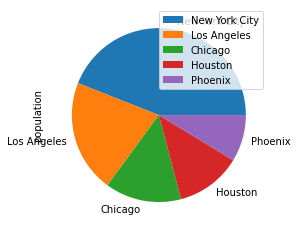

In [53]:
axs = usa_city_population.plot.pie(y='population')

In [54]:
china_city_population = pd.DataFrame({
    'population': [26917322, 20381745, 15773658, 13552359, 13238590],
}, index = ['Shanghai', 'Beijing', 'Chongqing', 'Tianjin', 'Guangzhou'])

In [55]:
china_city_population

,population
Shanghai,26917322
Beijing,20381745
Chongqing,15773658
Tianjin,13552359
Guangzhou,13238590


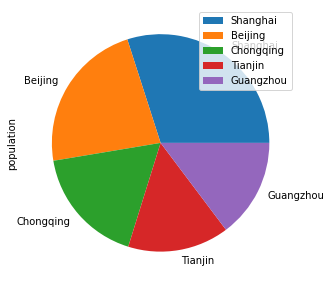

In [56]:
axs = china_city_population.plot.pie(y='population', figsize=(5, 5))

In [57]:
top_city_population = pd.DataFrame({
    'usa': usa_city_population['population'].values,
    'china': china_city_population['population'].values
}, index = ['top1', 'top2', 'top3', 'top4', 'top5'])

In [58]:
top_city_population

,usa,china
top1,8398748,26917322
top2,3990456,20381745
top3,2705994,15773658
top4,2325502,13552359
top5,1660272,13238590


##### Bar Plot

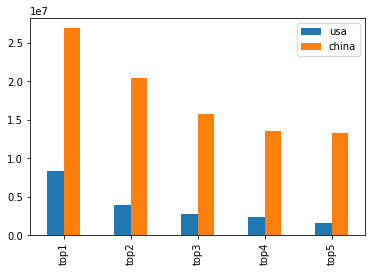

In [59]:
axs = top_city_population.plot.bar()

<AxesSubplot:xlabel='index'>

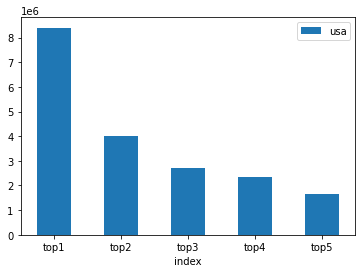

In [60]:
top_city_population.reset_index().plot.bar(x = 'index', y = 'usa', rot = 0)

In [61]:
data = pd.Series(np.random.randn(1000), index = np.arange(1000)) 
# 生成一組符合標準常態分布的隨機樣本值。

In [62]:
data = data.cumsum() # 將數據累加結果
data

0       1.414861
1       1.868851
2       2.753326
3       2.660954
4       2.318627
         ...    
995   -32.638147
996   -32.829984
997   -33.324953
998   -33.374179
999   -33.582998
Length: 1000, dtype: float64

#### Simple Plot

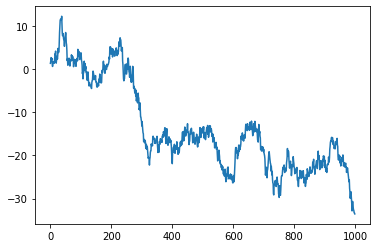

In [63]:
axs = data.plot()

生成四組標準常態分佈之隨機變數，並將結果累加

In [64]:
data = pd.DataFrame(np.random.randn(1000, 4), index = np.arange(1000), columns = ["A", "B", "C", "D"])

In [65]:
data = data.cumsum()

<AxesSubplot:>

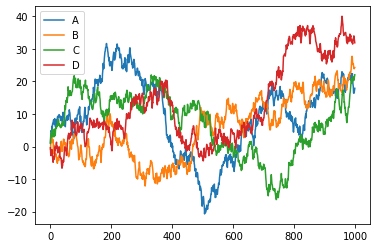

In [66]:
data.plot()

In [67]:
data

,A,B,C,D
0,1.146744,-0.762755,0.949934,-0.365754
1,3.441360,0.633500,2.257874,-2.121911
2,4.826977,1.379852,3.960020,-2.797466
3,4.991529,2.392292,3.030616,-2.028752
4,4.475837,3.568270,3.216517,-1.307754
...,...,...,...,...
995,16.504050,24.570218,21.091973,33.211226
996,16.348442,23.954519,20.368027,34.017749
997,16.549541,23.900398,20.911674,33.309442
998,17.241001,24.188785,21.498992,32.613003


##### Scatter Plot

上面顯示 1000 rows x 4 columns

<AxesSubplot:xlabel='A', ylabel='B'>

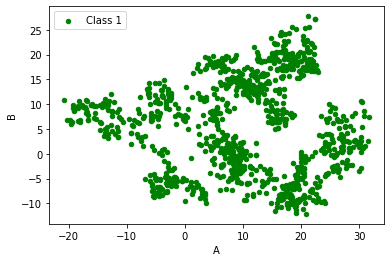

In [68]:
data.plot.scatter(x = 'A', y = 'B', color='Green', label='Class 1')

<AxesSubplot:xlabel='A', ylabel='C'>

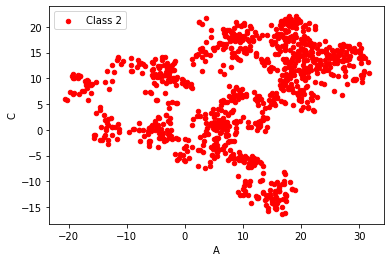

In [69]:
data.plot.scatter(x = 'A', y = 'C', color='Red', label='Class 2')

將上述二個 scatter 圖 疊加一起 顯示

<AxesSubplot:xlabel='A', ylabel='C'>

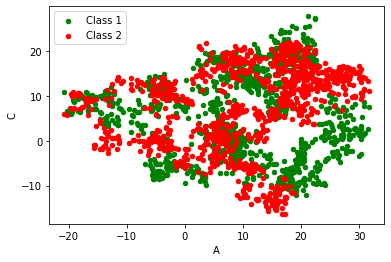

In [70]:
ax1 = data.plot.scatter(x = 'A', y = 'B', color='Green', label='Class 1')
data.plot.scatter(x = 'A', y = 'C', color='Red', label='Class 2', ax = ax1)

##### Box Plot

<AxesSubplot:>

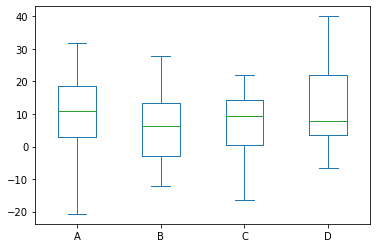

In [71]:
data.plot.box()

#### Area Plot

先將所有數值都變為 正數 --- abs

In [72]:
data = np.abs(data)

In [73]:
data

,A,B,C,D
0,1.146744,0.762755,0.949934,0.365754
1,3.441360,0.633500,2.257874,2.121911
2,4.826977,1.379852,3.960020,2.797466
3,4.991529,2.392292,3.030616,2.028752
4,4.475837,3.568270,3.216517,1.307754
...,...,...,...,...
995,16.504050,24.570218,21.091973,33.211226
996,16.348442,23.954519,20.368027,34.017749
997,16.549541,23.900398,20.911674,33.309442
998,17.241001,24.188785,21.498992,32.613003


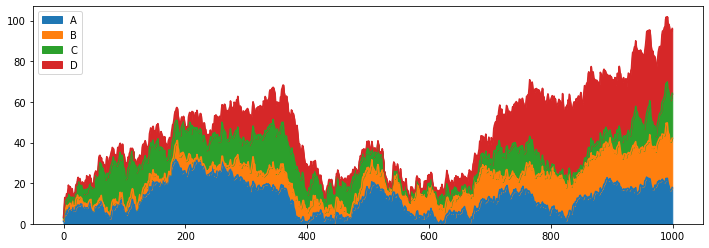

In [75]:
axs = data.plot.area(figsize=(12, 4))

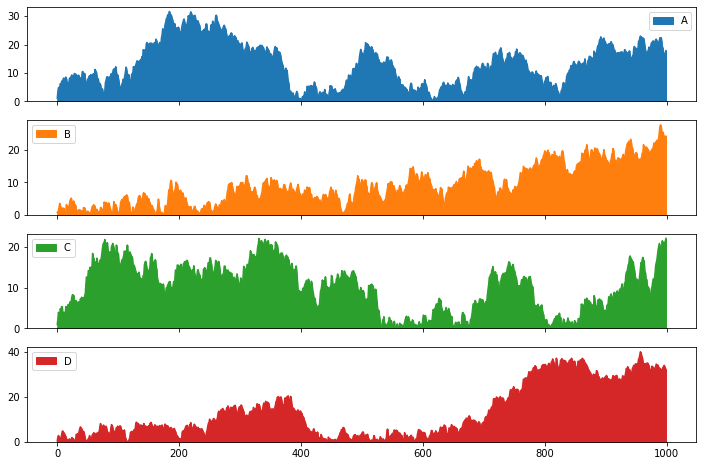

In [77]:
axs = data.plot.area(figsize=(12, 8), subplots = True)